**Dummy Project House Price Prediction**

This project will be explore and prediction price of house with `train` data set

In [83]:
!pip install keras-tuner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow import keras

**Load Data**

Call data train from drive/ folder

In [82]:
df = pd.read_csv('/content/drive/MyDrive/Train ML/train.csv')

With comman `head`, we can see 10 highlight of data

In [3]:
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

from above data we can see any 81 columns, so if we can see fulltype of data we can use comand `info()`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

from above comand we have 1460 row, 80 column, float64 data types 3 column, int64 data types 35 columns and object data types 43 coulmns. Explain every columns in below:

 - `SalePrice` : the property's sale price in dollars. This is the target variable that you're trying to predict.
 - `MSSubClass`: The building class
 - `MSZoning`: The general zoning classification
 - `LotFrontage`: Linear feet of street connected to property
 - `LotArea`: Lot size in square feet
 - `Street`: Type of road access
 - `Alley`: Type of alley access
 - `LotShape`: General shape of property
 - `LandContour`: Flatness of the property
 - `Utilities`: Type of utilities available
 - `LotConfig`: Lot configuration
 - `LandSlope`: Slope of property
 - `Neighborhood`: Physical locations within Ames city limits
 - `Condition1`: Proximity to main road or railroad
 - `Condition2`: Proximity to main road or railroad (if a second is present)
 - `BldgType`: Type of dwelling
 - `HouseStyle`: Style of dwelling
 - `OverallQual`: Overall material and finish quality
 - `OverallCond`: Overall condition rating
 - `YearBuilt`: Original construction date
 - `YearRemodAdd`: Remodel date
 - `RoofStyle`: Type of roof
 - `RoofMatl`: Roof material
 - `Exterior1st`: Exterior covering on house
 - `Exterior2nd`: Exterior covering on house (if more than one material)
 - `MasVnrType`: Masonry veneer type
 - `MasVnrArea`: Masonry veneer area in square feet
 - `ExterQual`: Exterior material quality
 - `ExterCond`: Present condition of the material on the exterior
 - `Foundation`: Type of foundation
 - `BsmtQual`: Height of the basement
 - `BsmtCond`: General condition of the basement
 - `BsmtExposure`: Walkout or garden level basement walls
 - `BsmtFinType1`: Quality of basement finished area
 - `BsmtFinSF1`: Type 1 finished square feet
 - `BsmtFinType2`: Quality of second finished area (if present)
 - `BsmtFinSF2`: Type 2 finished square feet
 - `BsmtUnfSF`: Unfinished square feet of basement area
 - `TotalBsmtSF`: Total square feet of basement area
 - `Heating`: Type of heating
 - `HeatingQC`: Heating quality and condition
 - `CentralAir`: Central air conditioning
 - `Electrical`: Electrical system
 - `1stFlrSF`: First Floor square feet
 - `2ndFlrSF`: Second floor square feet
 - `LowQualFinSF`: Low quality finished square feet (all floors)
 - `GrLivArea`: Above grade (ground) living area square feet
 - `BsmtFullBath`: Basement full bathrooms
 - `BsmtHalfBath`: Basement half bathrooms
 - `FullBath`: Full bathrooms above grade
 - `HalfBath`: Half baths above grade
 - `Bedroom`: Number of bedrooms above basement level
 - `Kitchen`: Number of kitchens
 - `KitchenQual`: Kitchen quality
 - `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
 - `Functional`: Home functionality rating
 - `Fireplaces`: Number of fireplaces
 - `FireplaceQu`: Fireplace quality
 - `GarageType`: Garage location
 - `GarageYrBlt`: Year garage was built
 - `GarageFinish`: Interior finish of the garage
 - `GarageCars`: Size of garage in car capacity
 - `GarageArea`: Size of garage in square feet
 - `GarageQual`: Garage quality
 - `GarageCond`: Garage condition
 - `PavedDrive`: Paved driveway
 - `WoodDeckSF`: Wood deck area in square feet
 - `OpenPorchSF`: Open porch area in square feet
 - `EnclosedPorch`: Enclosed porch area in square feet
 - `3SsnPorch`: Three season porch area in square feet
 - `ScreenPorch`: Screen porch area in square feet
 - `PoolArea`: Pool area in square feet
 - `PoolQC`: Pool quality
 - `Fence`: Fence quality
 - `MiscFeature`: Miscellaneous feature not covered in other categories
 - `MiscVal`: $Value of miscellaneous feature
 - `MoSold`: Month Sold
 - `YrSold`: Year Sold
 - `SaleType`: Type of sale
 - `SaleCondition`: Condition of sale


**Data Cleaning**

we will change data type from object to category

In [5]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
print(df.dtypes)

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object


we will check missing values use `isnull().sum()`

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

if data frame any NA over 20% we will delete this column

In [7]:
threshold = 0.2

columns_to_drop = df.columns[df.isna().mean() > threshold]

df_cleaned = df.drop(columns=columns_to_drop)

print("\nDrop Column:", list(columns_to_drop))
print("\nDataFrame After Drop Column:")
print(df_cleaned)


Drop Column: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

DataFrame After Drop Column:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     L

We can treat missing values use `fillna`

In [8]:
for col in df_cleaned.select_dtypes(include=['float64', 'int64']):
    median_value = df_cleaned[col].median()
    df_cleaned[col].fillna(median_value, inplace=True)

for col in df_cleaned.select_dtypes(include='category'):
    df_cleaned[col].fillna(method='ffill', inplace=True)
    df_cleaned[col].fillna(method='bfill', inplace=True)

<ipython-input-8-f4f6cf36cf22>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_value, inplace=True)
<ipython-input-8-f4f6cf36cf22>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

check again NA and see highlight of data frame

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

all column in data frame has no NA

**Exploration Data Analyst**

We Will check correlation all column with `SalePrice`

In [10]:
numerik_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
corr_numerik = df_cleaned[numerik_cols].corrwith(df_cleaned['SalePrice'], method='pearson')

print("\nCorrelation numeric with SalePrice:")
print(corr_numerik)


Correlation numeric with SalePrice:
Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.334771
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.466754
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
d

Strong correlation is 1 or -1, if near 0 is weak correlation

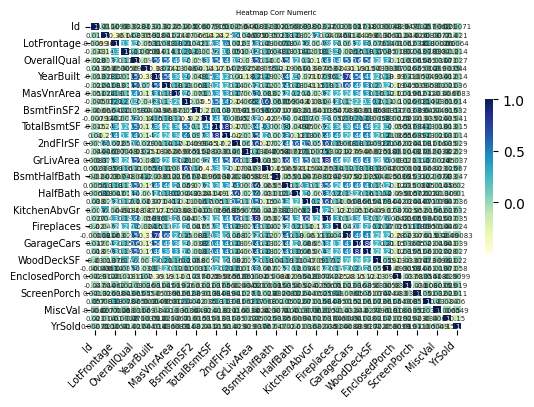

In [11]:
corr_matrix = df_cleaned[numerik_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='YlGnBu',
    linewidths=0.3,
    annot_kws={"size": 5},
    cbar_kws={"shrink": 0.5}
)


plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(rotation=0, fontsize=7)


plt.title('Heatmap Corr Numeric', fontsize=5)
plt.show()

for categorical as this bellow

In [12]:
from scipy.stats import chi2_contingency


def chi_square(col):
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['SalePrice'])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    return p

kategori_cols = df_cleaned.select_dtypes(include='category').columns
chi_square_results = {col: chi_square(col) for col in kategori_cols}

print("\nP-Value Chi-Square with Target:")
print(chi_square_results)


P-Value Chi-Square with Target:
{'MSZoning': 4.3483250606822396e-11, 'Street': 8.338870380464053e-09, 'LotShape': 4.724729155980402e-12, 'LandContour': 0.08674645041917711, 'Utilities': 1.0, 'LotConfig': 0.045806211958033756, 'LandSlope': 0.10508638737793884, 'Neighborhood': 1.364960102688296e-08, 'Condition1': 1.0, 'Condition2': 0.07598640644469955, 'BldgType': 0.9999860714473023, 'HouseStyle': 0.6482615179447816, 'RoofStyle': 1.0, 'RoofMatl': 1.0, 'Exterior1st': 0.9999839433628513, 'Exterior2nd': 0.8469189757654344, 'ExterQual': 4.250289171585687e-34, 'ExterCond': 9.869790306250171e-13, 'Foundation': 9.66452199704509e-06, 'BsmtQual': 4.861003920486632e-22, 'BsmtCond': 3.6637075061045956e-15, 'BsmtExposure': 1.6872572948187095e-08, 'BsmtFinType1': 0.9755279680342124, 'BsmtFinType2': 0.9999978234408667, 'Heating': 2.477753304101386e-24, 'HeatingQC': 0.9995946871632676, 'CentralAir': 1.2257126695737677e-05, 'Electrical': 0.052835134010111195, 'KitchenQual': 1.2820744991685297e-31, 'Fun

if P-value < 0.05 column category have correlation significant with `SalePrice`

we will check use plot below

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


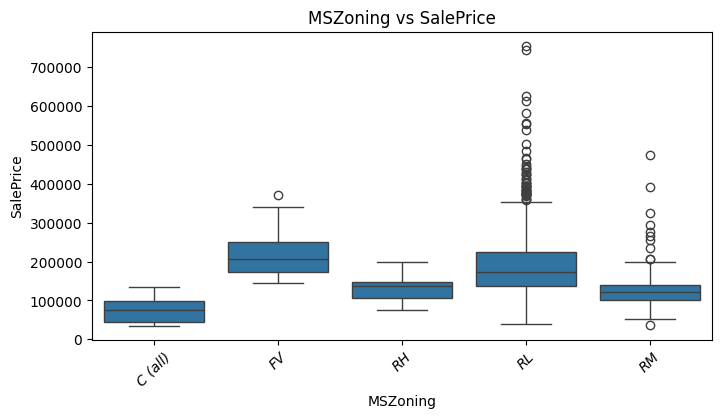

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


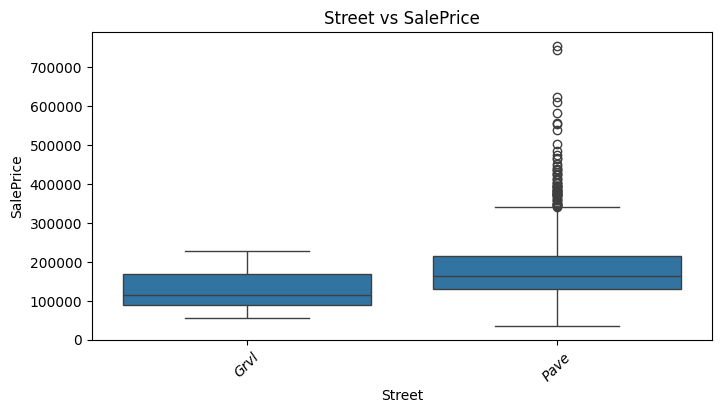

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


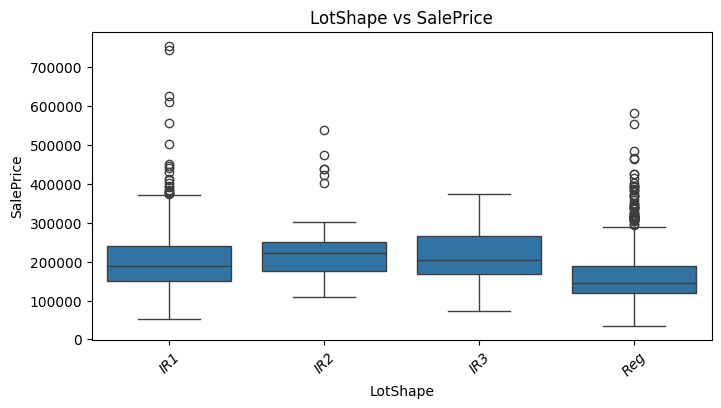

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


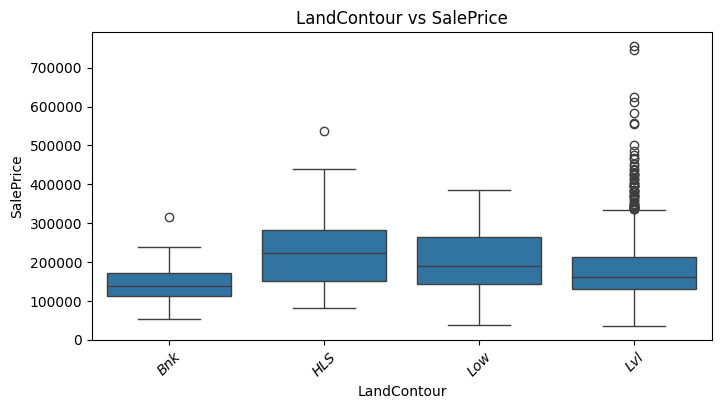

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


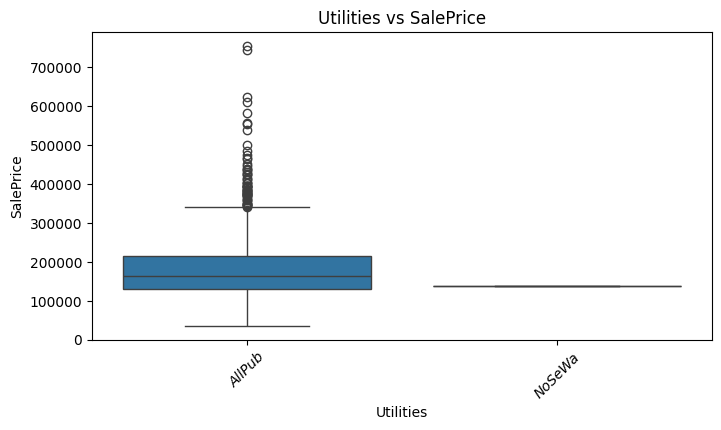

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


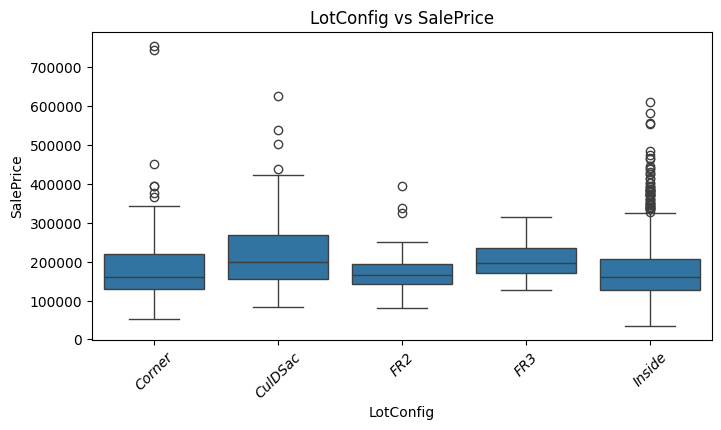

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


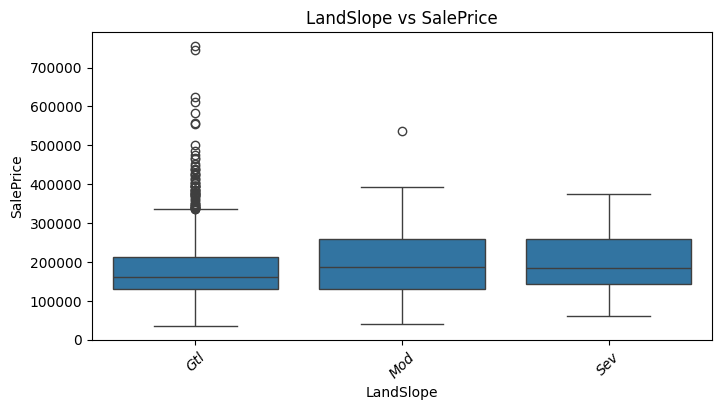

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


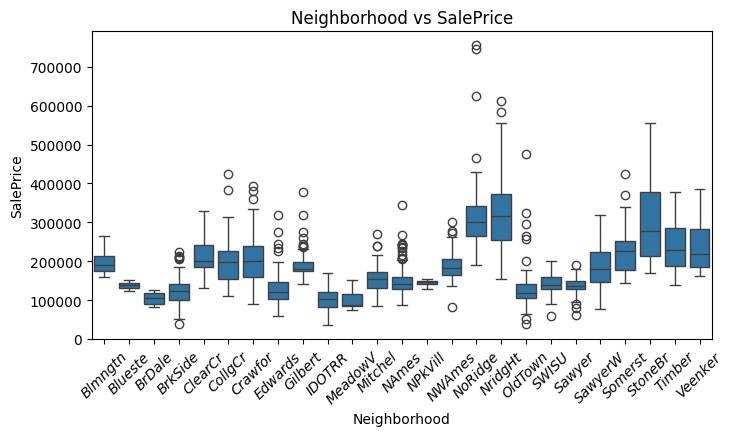

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


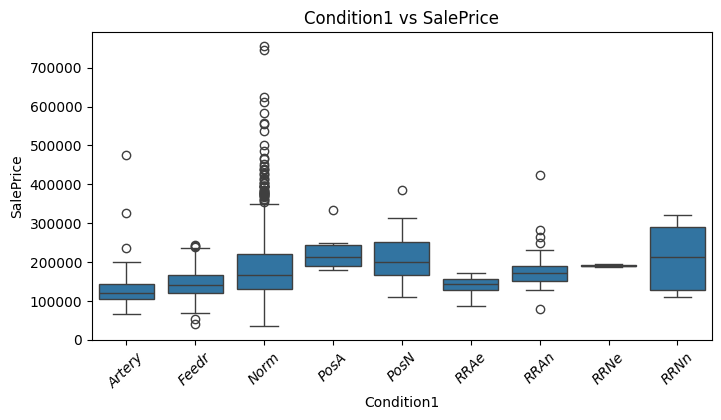

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


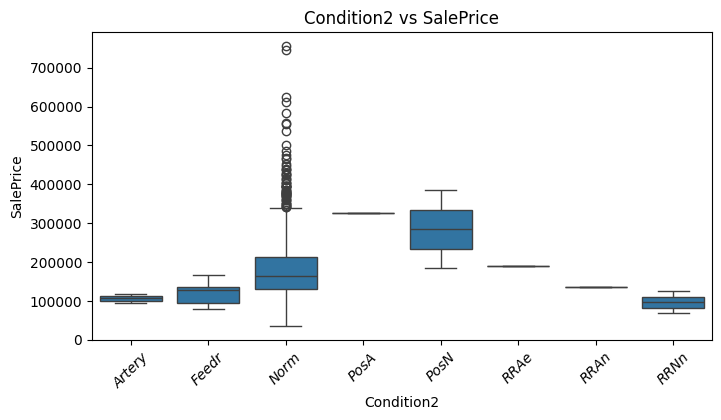

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


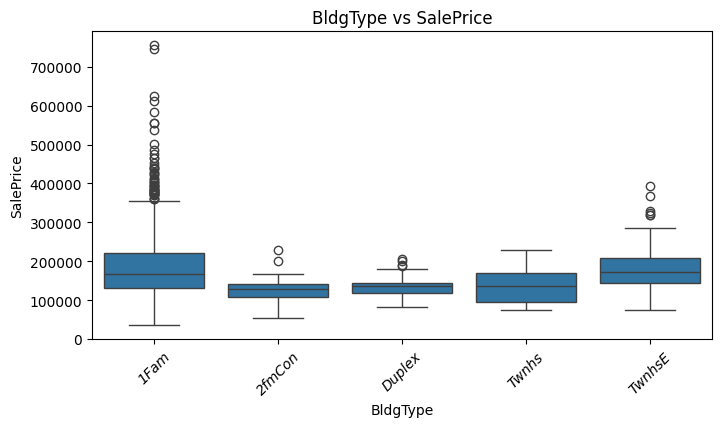

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


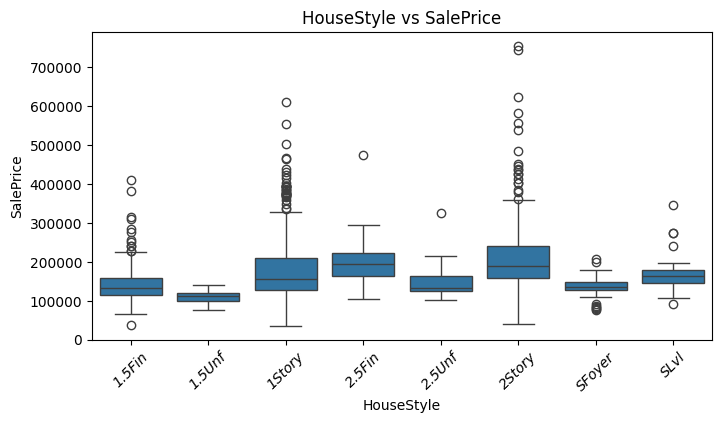

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


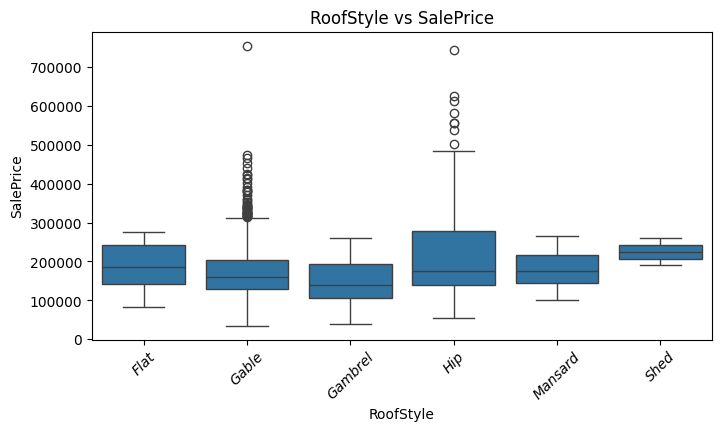

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


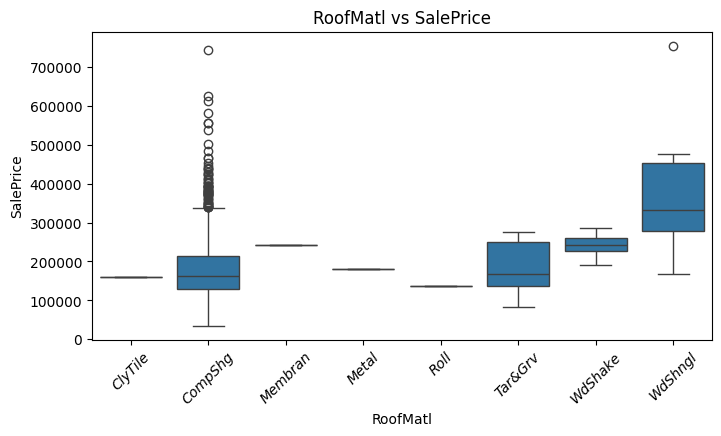

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


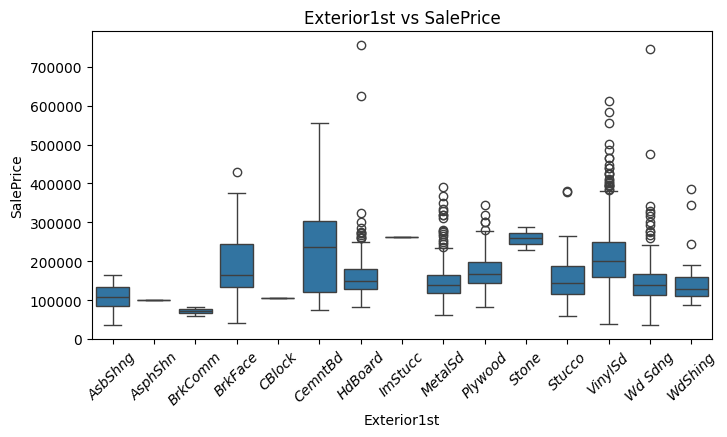

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


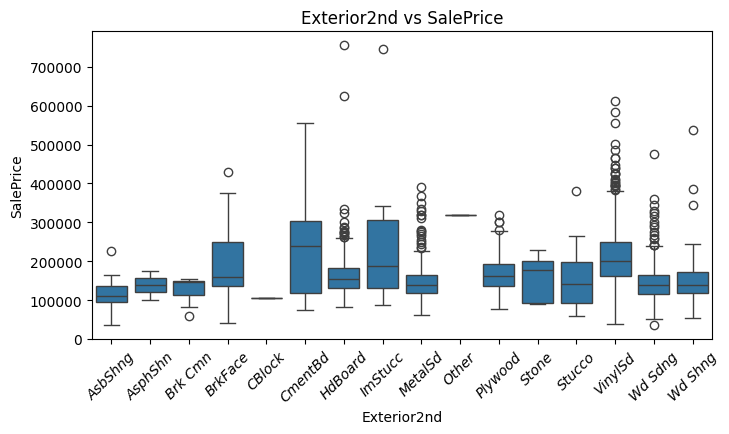

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


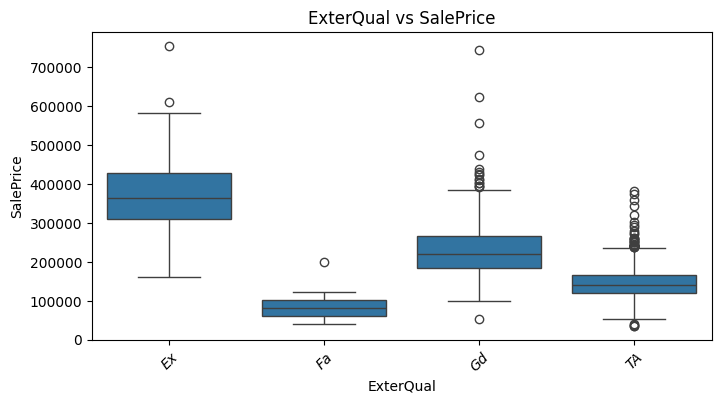

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


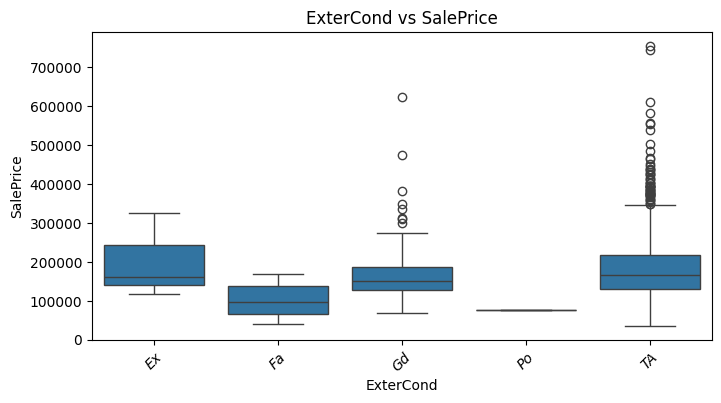

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


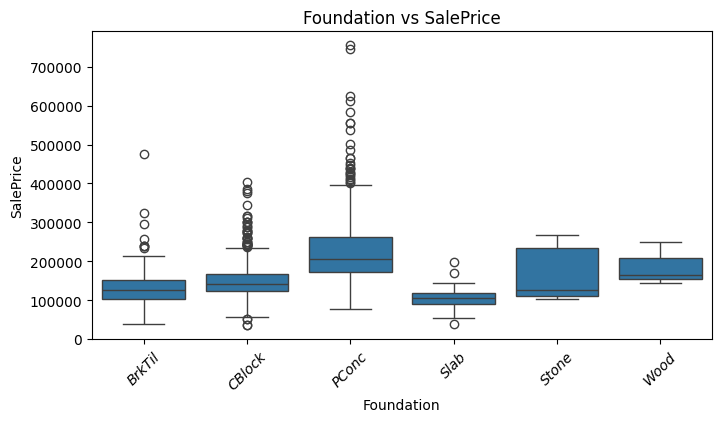

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


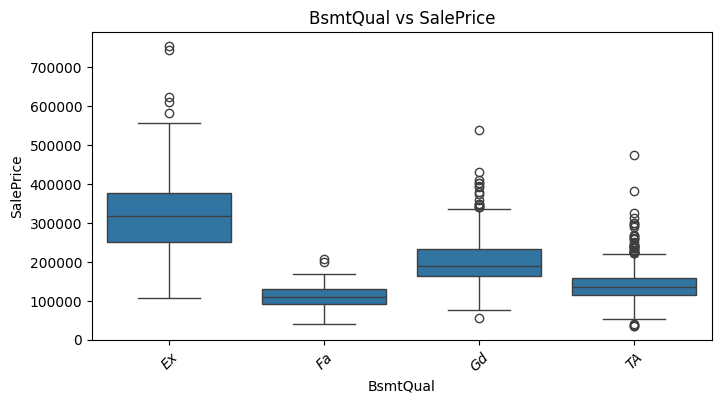

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


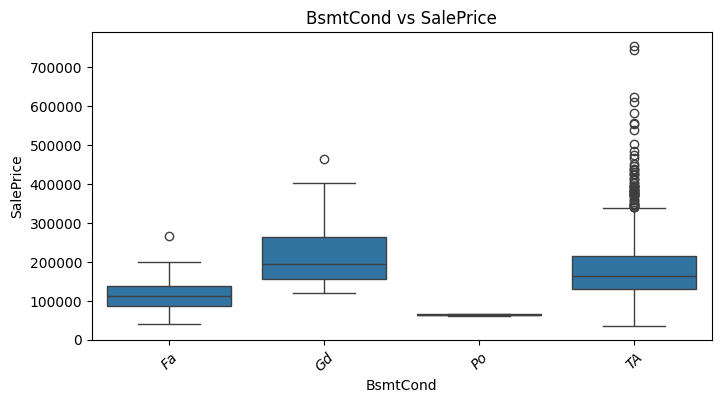

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


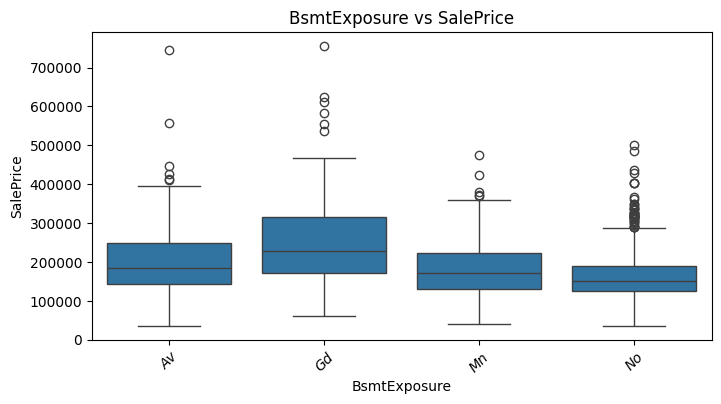

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


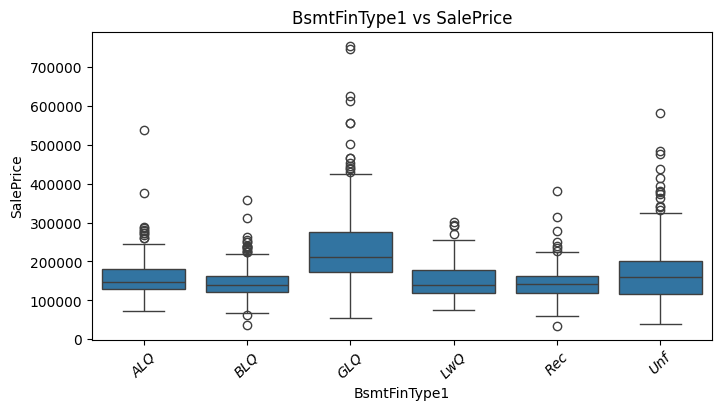

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


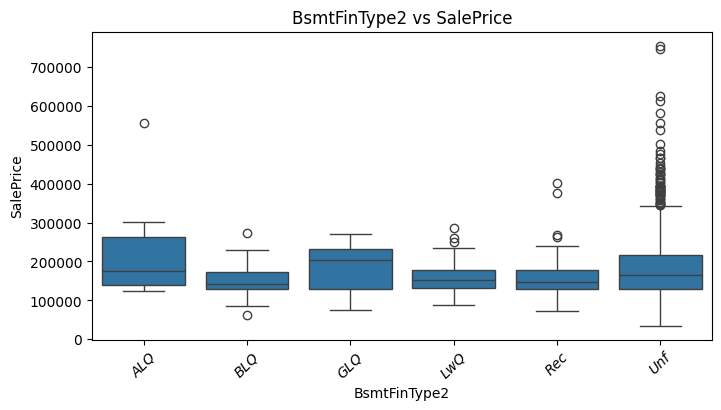

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


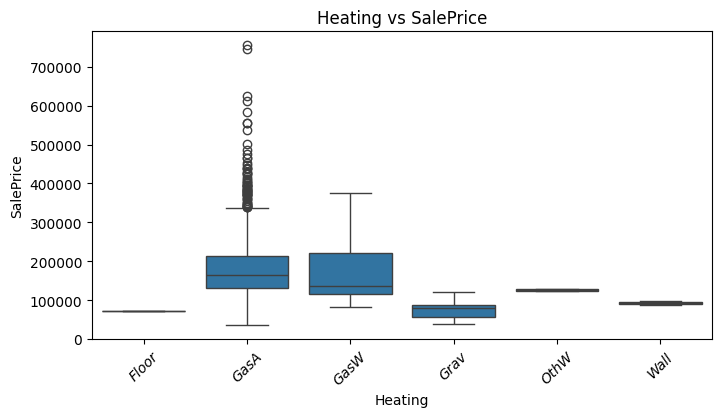

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


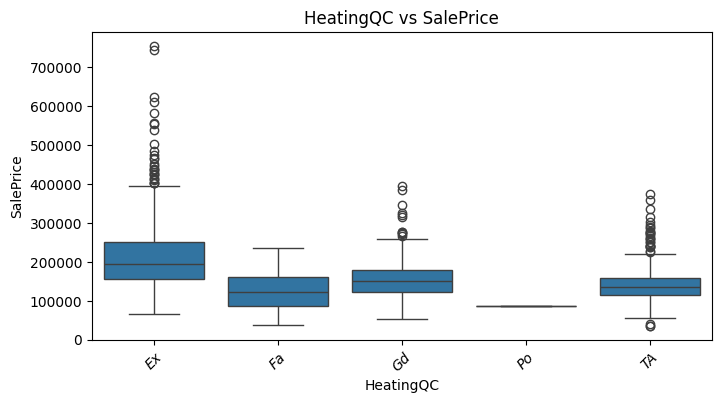

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


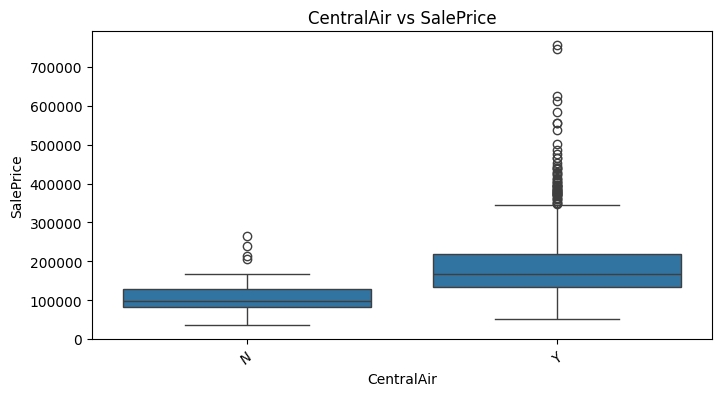

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


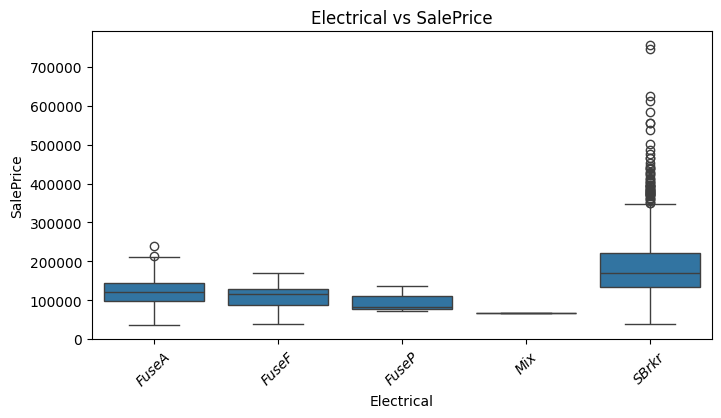

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


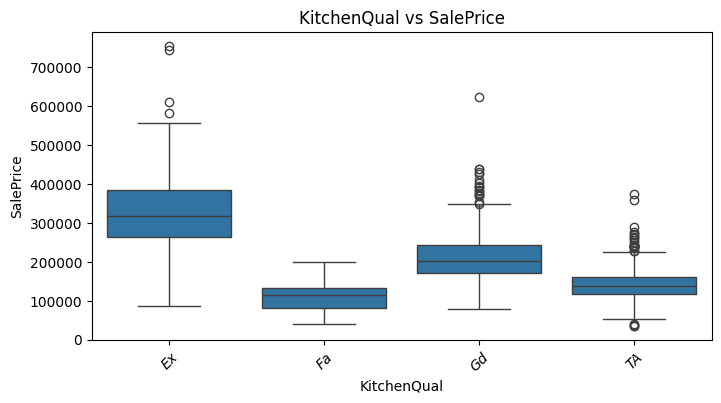

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


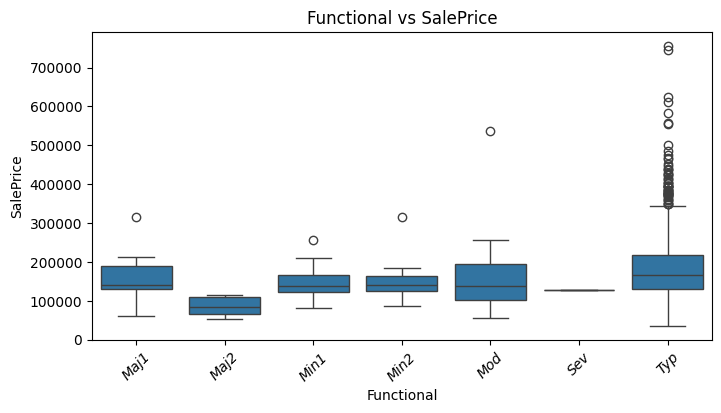

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


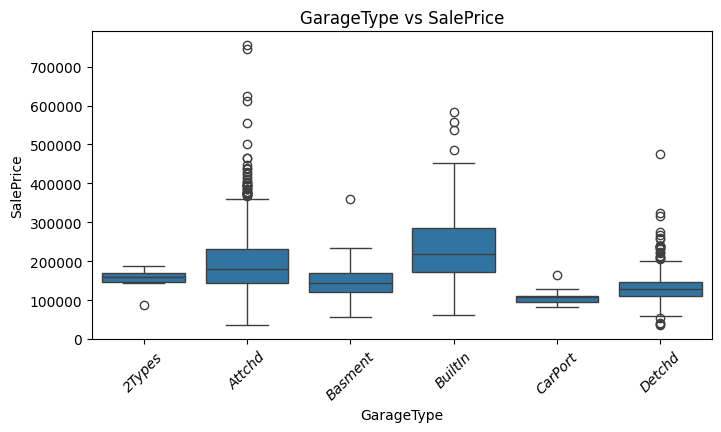

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


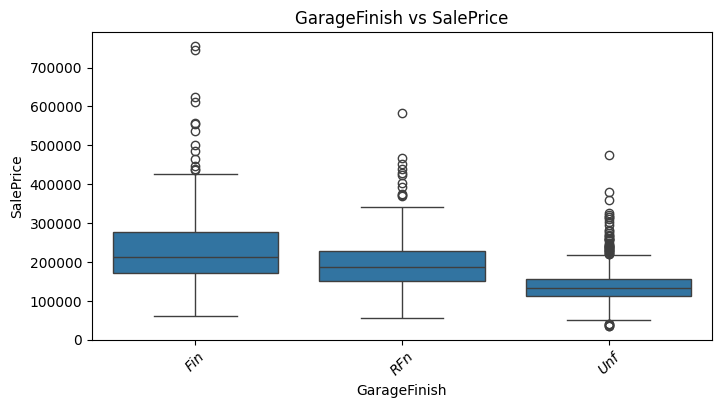

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


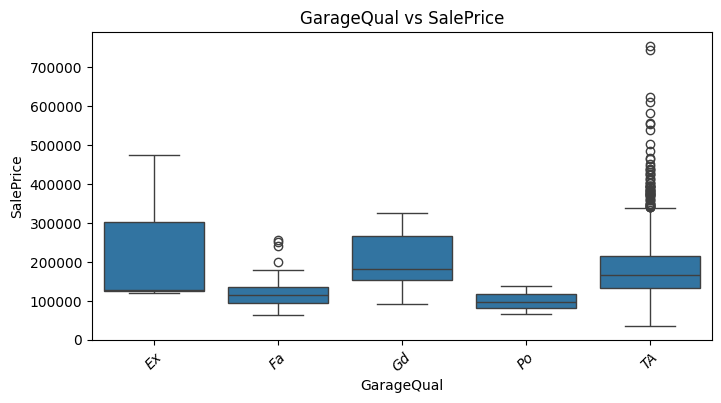

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


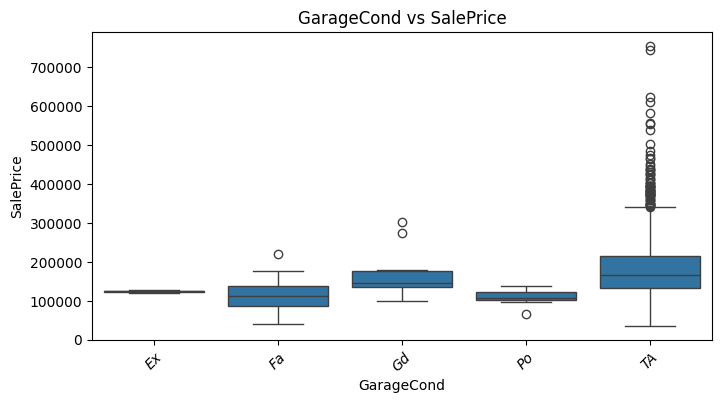

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


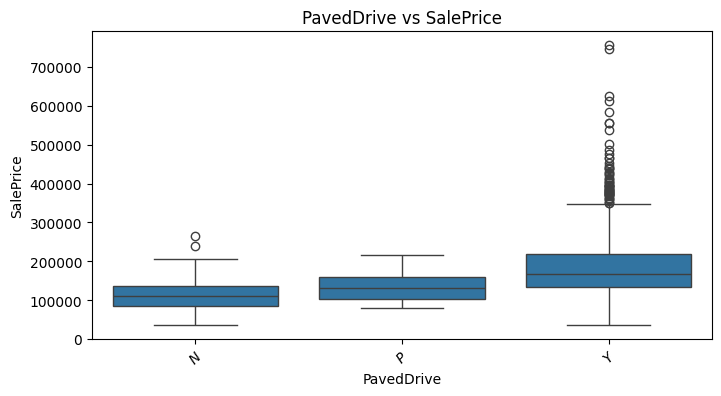

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


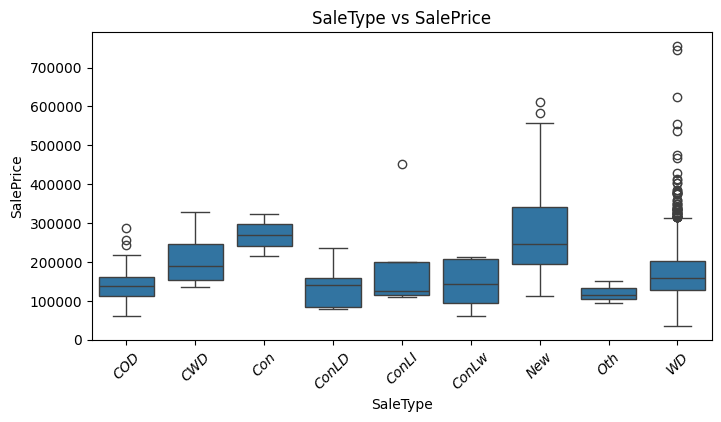

<ipython-input-14-7ec7c213d60d>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')


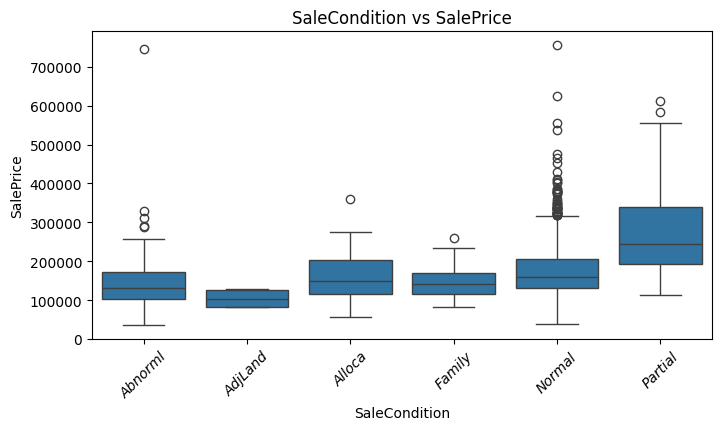

In [14]:
for cat in ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope'
, 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual'
, 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir'
, 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']:
    plt.figure(figsize=(8, 4))
    ax=sns.boxplot(x=cat, y='SalePrice', data=df_cleaned)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontstyle='italic')
    plt.title(f"{cat} vs SalePrice")
    plt.show()

From box plot above we have insight:

 - highest median `SalePrice` with `MSZoning` type `FV`
 - lowest median `SalePrice` with `MSZoning` type `C(all)`
 - highest mean `SalePrice` with `MSZoning` type `RL`
 - lowest mean `SalePrice` with `MSZoning` type `RM`
 - any outlier in `MSZoning` with type `FV`, `RL`, and `RM`
 - median and mean high on `Street` type `Pave`
 - in `Street` type `Pave` we look any outliers with start `SalesPrice` 350000 until above 700000
 - `LotShape` type `IR3` with mean highest
 - `LotShape` type `IR2` with median highest
 - `LotShape` type `Reg` with mean and median lowest
 - No outliers only `LotShape` type `IR3`
 - `LandContour` type`Bnk` is lowest mean and median, but any outlier above 300000
 - `LandContour` type`HLS` is biggest mean and median, but any outlier above 500000
 - `LandContour` type`Lvl` with biggest outliers until above 7000000
 - `Utilities` type `AllPub` majority data
 - mean and median highest in `lotConfig` type `CulDSac`
 - `lotConfig` type `Corner` with `SalePrice` highest until 700000
 - `LandSlope` type `gtl` with `SalePrice` highest and the most outliers
 - mean and median `SalePrice` in `LandSlope` type Mod is highest
 - mean highest `SalePrice` with `Neighborhood`type `Somerst`
 - median highest `SalePrice` with `Neighborhood`type `NoRidge`
 - mean lowest `SalePrice` with `Neighborhood`type `NAmes`
 - median lowest `SalePrice` with `Neighborhood`type `IDOTRR`
 - mean and median highest `SalePrice` with `Condition1` type `RRNn`
 - mean and median lowest `SalePrice` with `Condition1` type `RRNe`
 - median heighest `SalePrice` with `Condition2` type `PosA`
 - mean heighest `SalePrice` with `Condition2` type `PosN`
 - mean lowest `SalePrice` with `Condition2` type `PosA`
 - median lowest `SalePrice` with `Condition2` type `Artery`
 - median heighest `SalePrice` with `BldgType` type `1Fam` and `TwnhsE`
 - mean heighest `SalePrice` with `BldgType` type `1Fam`
 - median lowest `SalePrice` with `BldgType` type `2FmCon`
 - mean lowest `SalePrice` with `BldgType` type `Duplex`
 - median highest `SalePrice` with `HouseStyle` type `2.5fin`
 - mean highest `SalePrice` with `HouseStyle` type `2Story`
 - median and mean lowest `SalePrice` with `HouseStyle` type `1.5Unf`
 - median highest `SalePrice` with `RoofStyle` type `Sheed`
 - mean highest `SalePrice` with `RoofStyle` type `Hip`
 - mean lowest `SalePrice` with `RoofStyle` type `Sheed`
 - median lowest `SalePrice` with `RoofStyle` type `Gambrel`
 - mean and median highest `SalePrice` with `RoofMatl` type `WdShngl`
 - mean and median lowest `SalePrice` with `RoofMatl` type `Roll`
 - mean highest `SalePrice` with `Exterior1st` type `CementBd`
 - median highest `SalePrice` with `Exterior1st` type `LmStucc`
 - mean lowest `SalePrice` with `Exterior1st` type `CBlock`
 - median lowest `SalePrice` with `Exterior1st` type `AsphShn`
 - mean highest `SalePrice` with `Exterior2nd` type `CementBd`
 - median highest `SalePrice` with `Exterior2nd` type `Other`
 - mean and median lowest `SalePrice` with `Exterior2nd` type `CBlock`
 - mean and median highest `SalePrice` with `ExterQual` type `Ex`
 - mean and median lowest `SalePrice` with `ExterQual` type `Fa`
 - mean highest `SalePrice` with `ExterCond` type `Ex`
 - median highest `SalePrice` with `ExterCond` type `TA`
 - mean and median lowest  `SalePrice` with `ExterCond` type `Po`
 - median highest `SalePrice` with `Foundation` type `PConc`
 - mean highest `SalePrice` with `Foundation` type `Stone`
 - mean and median lowest `SalePrice` with `Foundation` type `Slab`
 - mean and median highest `SalePrice` with `BsmtQual` type `Ex`
 - mean and median lowest `SalePrice` with `BsmtQual` type `Fa`
 - mean and median highest `SalePrice` with `BsmtCond` type `Gd`
 - mean and median lowest `SalePrice` with `BsmtCond` type `Po`
 - mean and median highest `SalePrice` with `BsmtExposure` type `Gd`
 - mean and median lowest `SalePrice` with `BsmtExposure` type `No`
 - mean and median highest `SalePrice` with `BsmtFinType1` type `GLQ`
 - mean and median lowest `SalePrice` with `BsmtFinType1` type `BLQ`
 - mean highest `SalePrice` with `BsmtFinType2` type `ALQ`
 - median highest `SalePrice` with `BsmtFinType2` type `GLQ`
 - mean and median lowest `SalePrice` with `BsmtFinType2` type `BLQ`
 - median highest `SalePrice` with `Heating` type `GasA`
 - mean highest `SalePrice` with `Heating` type `GasW`
 - mean and median lowest `SalePrice` with `Heating` type `Floor`
 - mean and median highest `SalePrice` with `HeatingQC` type `Ex`
 - mean and median lowest `SalePrice` with `HeatingQC` type `Po`
 - mean and median highest `SalePrice` with `CentralAir` type `Y`
 - mean and median lowest `SalePrice` with `CentralAir` type `N`
 - mean and median highest `SalePrice` with `Eelectrical` type `SBrkr`
 - mean and median lowest `SalePrice` with `Eelectrical` type `Mix`
 - mean and median highest `SalePrice` with `KitchenQual` type `Ex`
 - median lowest `SalePrice` with `KitchenQual` type `Fa`
 - mean lowest `SalePrice` with `KitchenQual` type `TA`
 - median highest `SalePrice` with `Functional` type `Typ`
 - mean highest `SalePrice` with `Functional` type `Mod`
 - mean lowest `SalePrice` with `Functional` type `Min2`
 - median lowest `SalePrice` with `Functional` type `Maj2`
 - mean and median highest `SalePrice` with `GarageType` type `BuiltIn`
 - mean and median lowest `SalePrice` with `GarageType` type `CarPort`
 - mean and median highest `SalePrice` with `GarageFinish` type `Fin`
 - mean and median lowest `SalePrice` with `GarageFinish` type `Unf`
 - mean highest `SalePrice` with `GarageQual` type `Ex`
 - median highest `SalePrice` with `GarageQual` type `Gd`
 - mean and median lowest `SalePrice` with `GarageQual` type `Po`
 - mean and median highest `SalePrice` with `GarageCond` type `TA`
 - mean lowest `SalePrice` with `GarageQual` type `Ex`
 - median lowest `SalePrice` with `GarageQual` type `Po`
 - mean and median highest `SalePrice` with `PavedDrive` type `Y`
 - mean and median lowest `SalePrice` with `PavedDrive` type `N`
 - mean highest `SalePrice` with `SaleType` type `New`
 - median highest `SalePrice` with `SaleType` type `Con`
 - mean and median lowest `SalePrice` with `SaleType` type `Oth`
 - mean and median highest `SalePrice` with `SaleCondition` type `Partial`
 - mean and median lowest `SalePrice` with `SaleCondition` type `AdjLand`

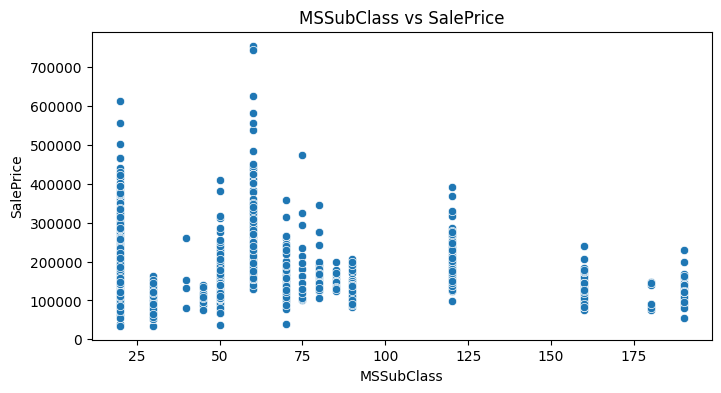

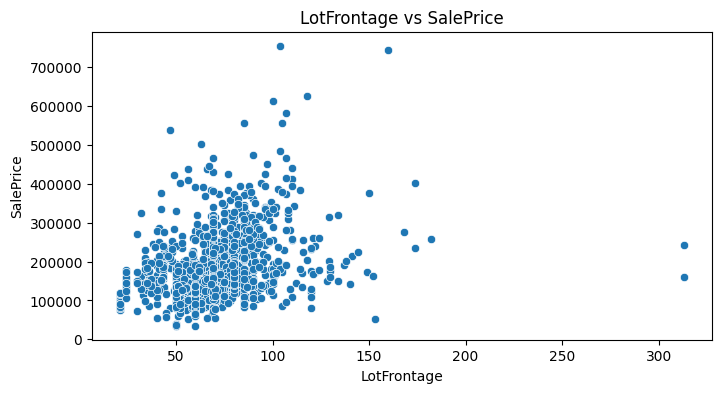

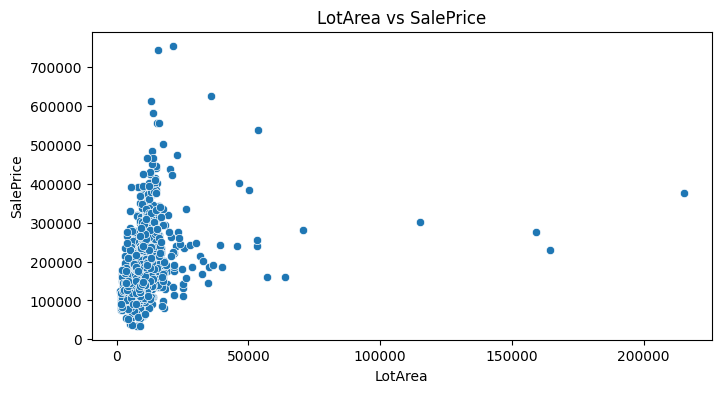

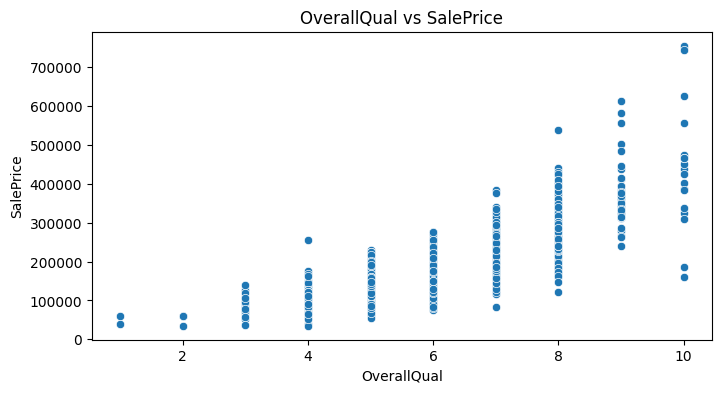

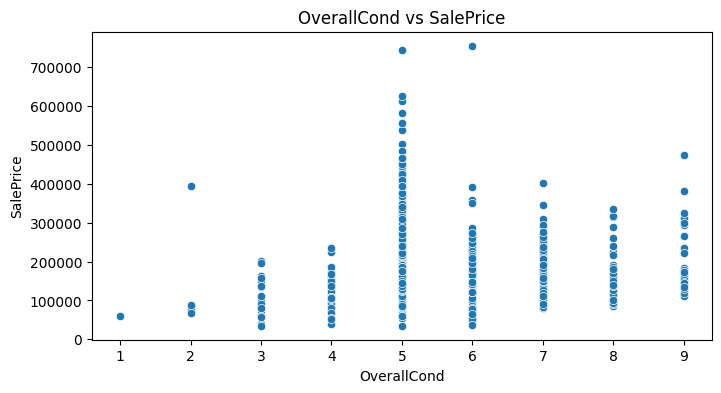

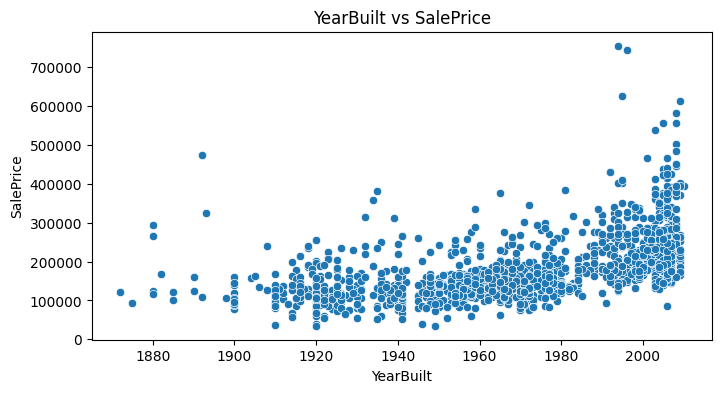

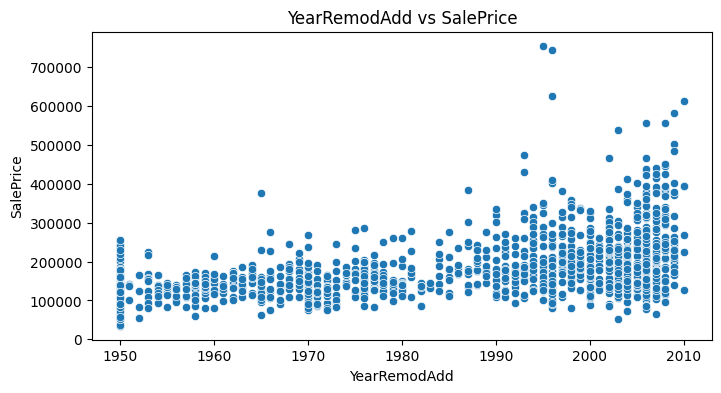

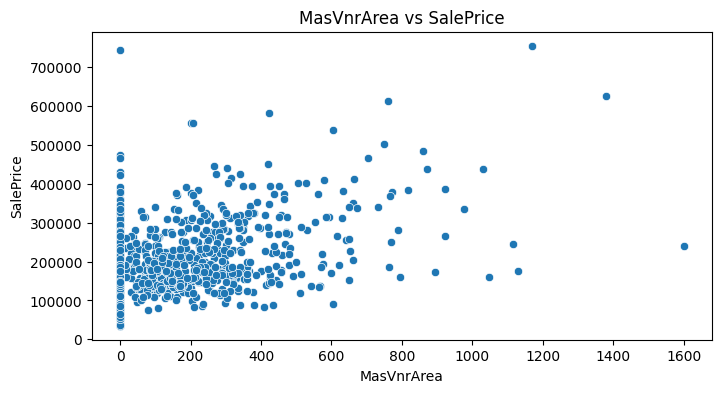

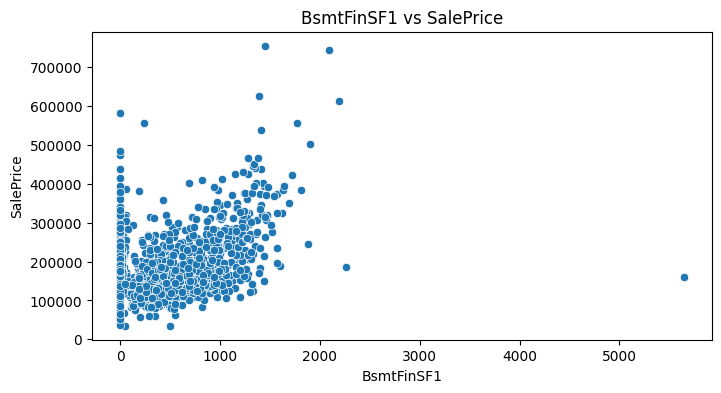

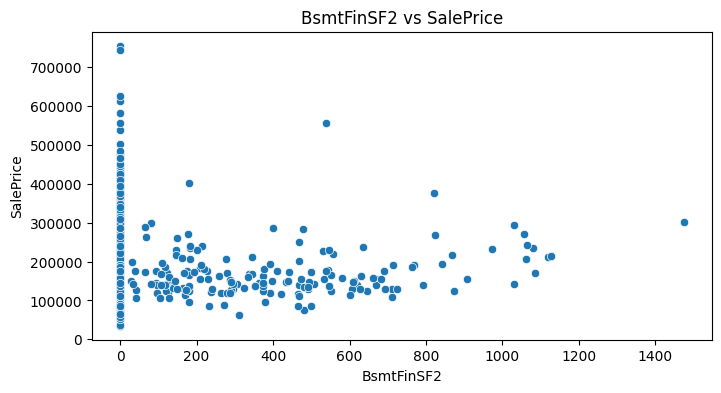

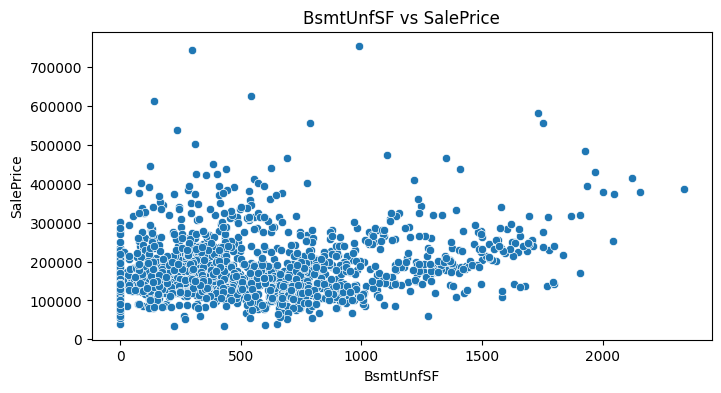

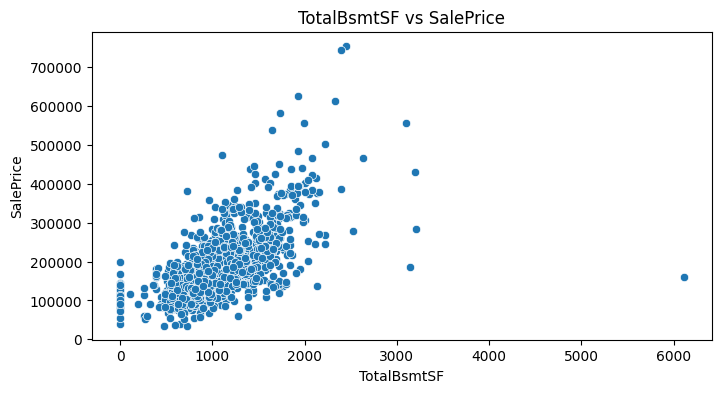

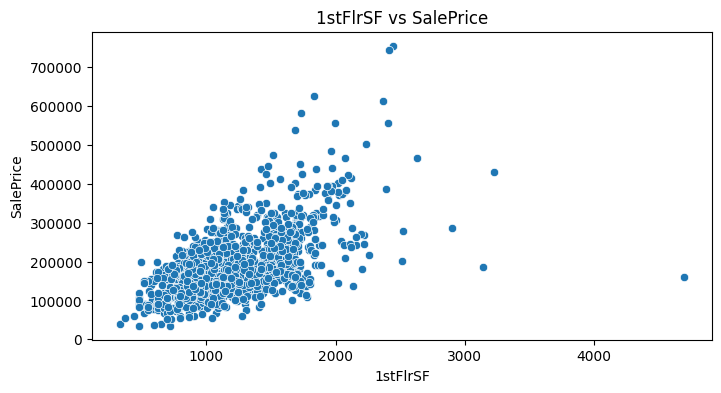

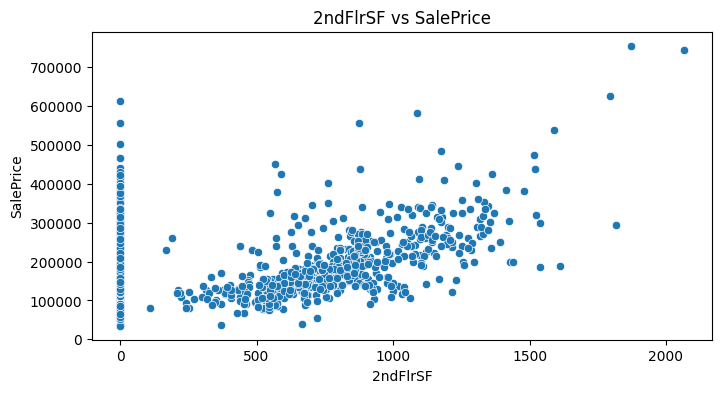

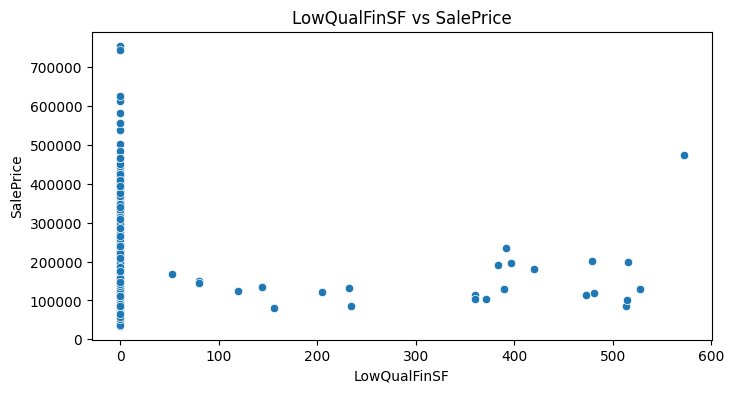

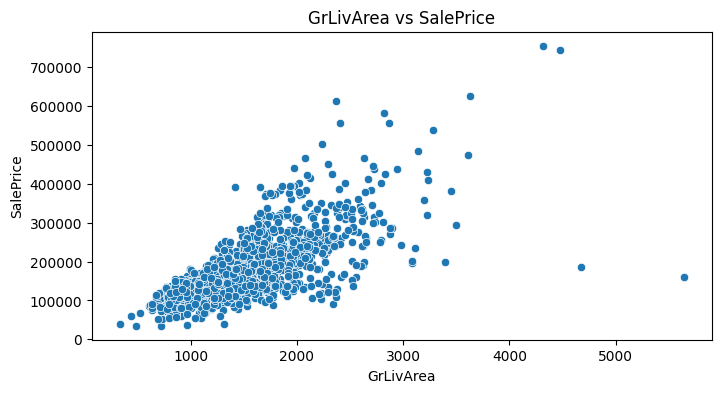

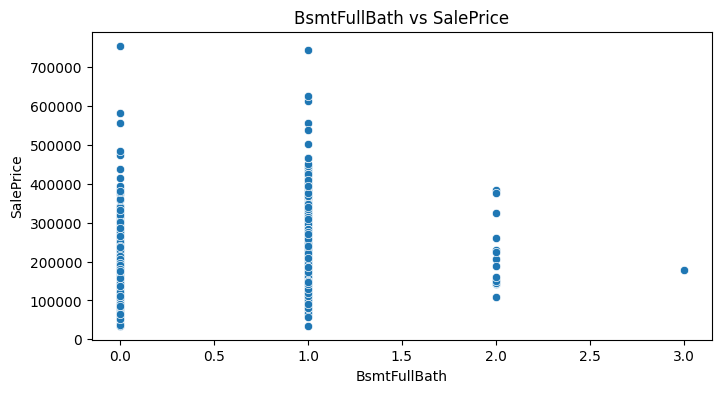

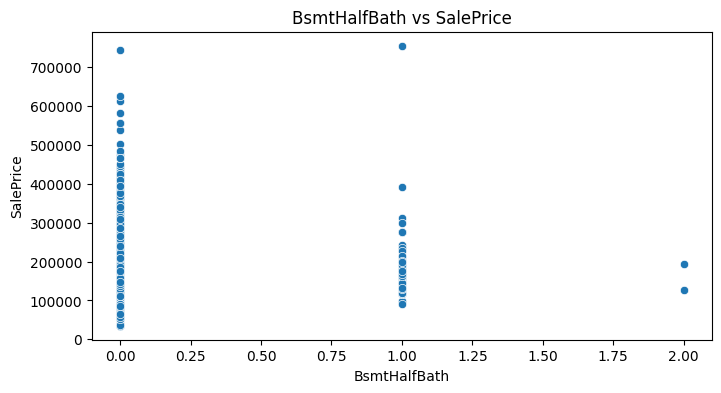

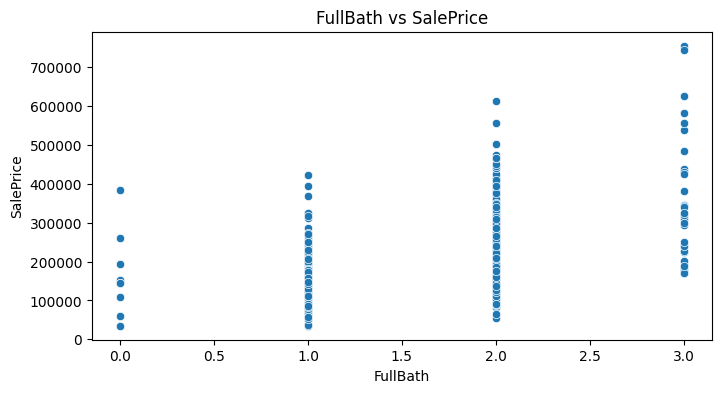

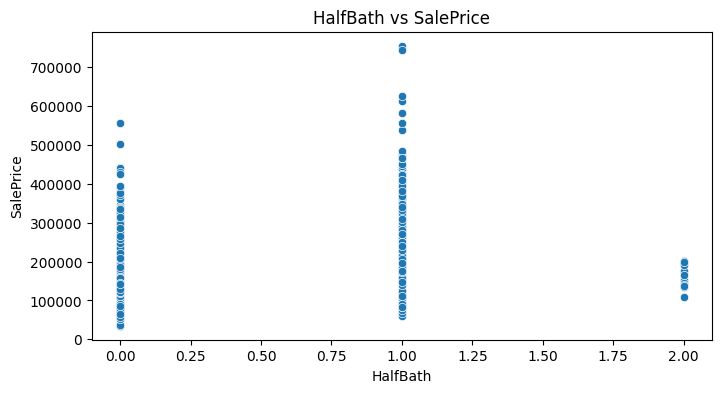

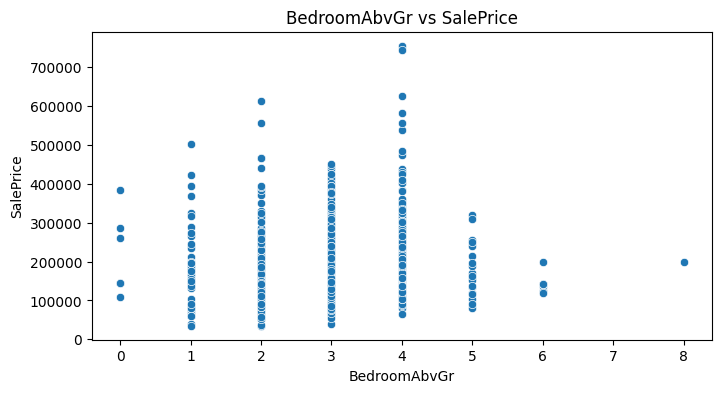

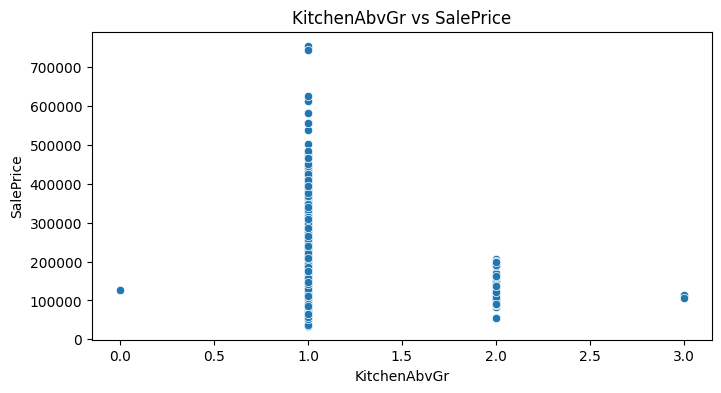

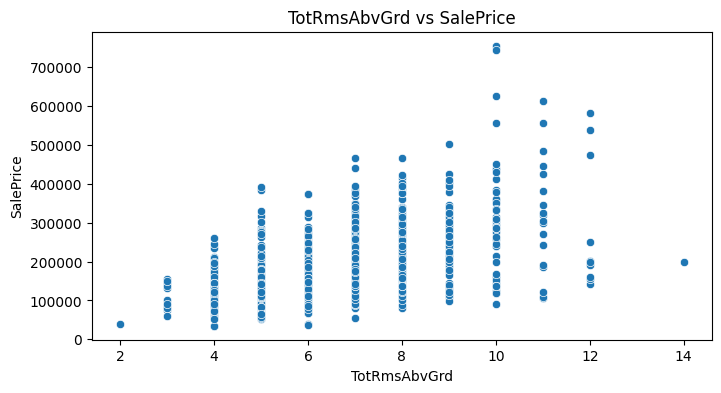

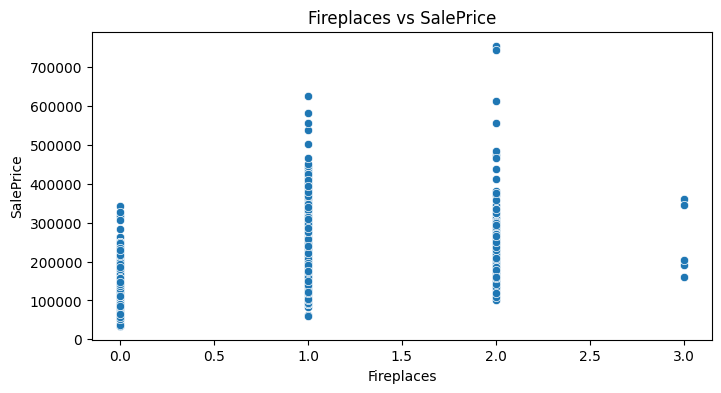

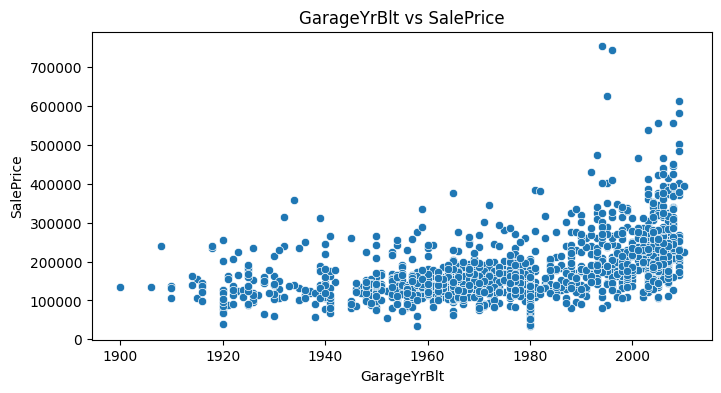

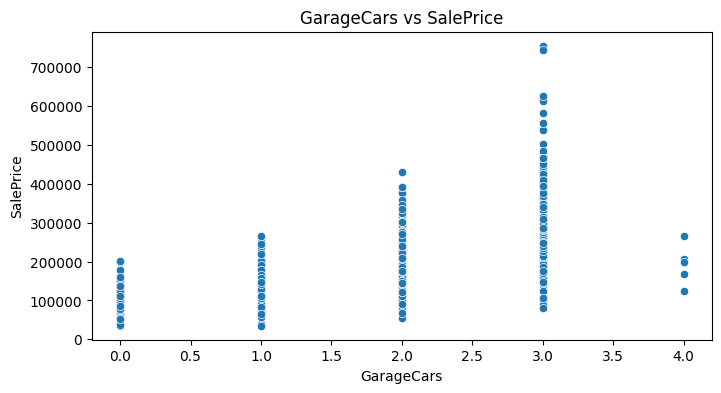

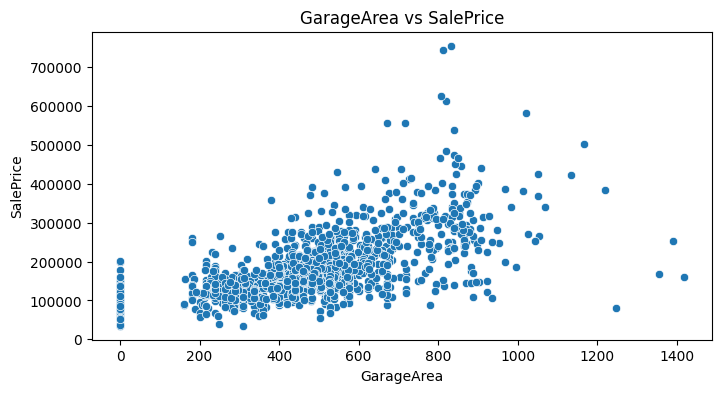

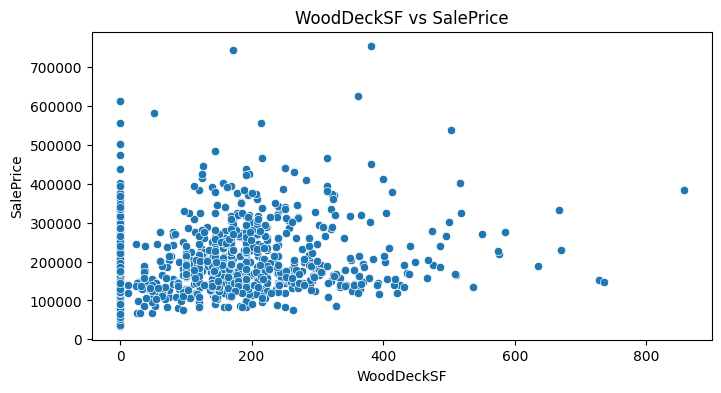

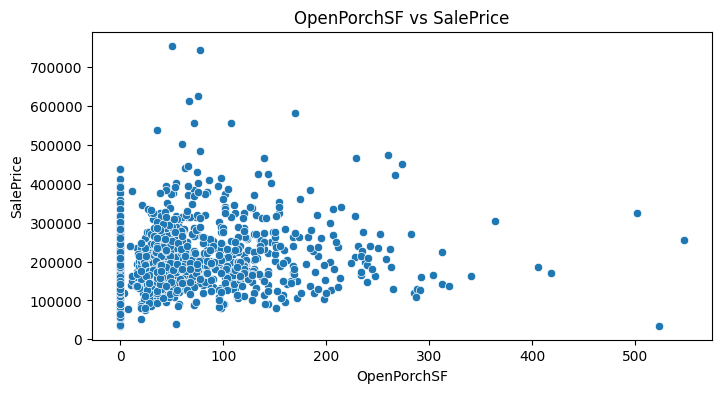

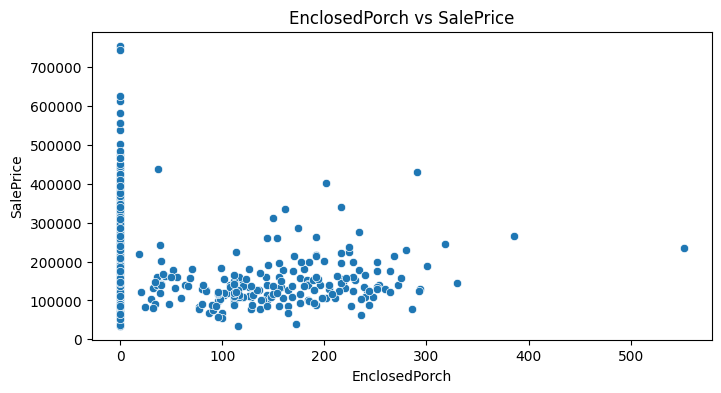

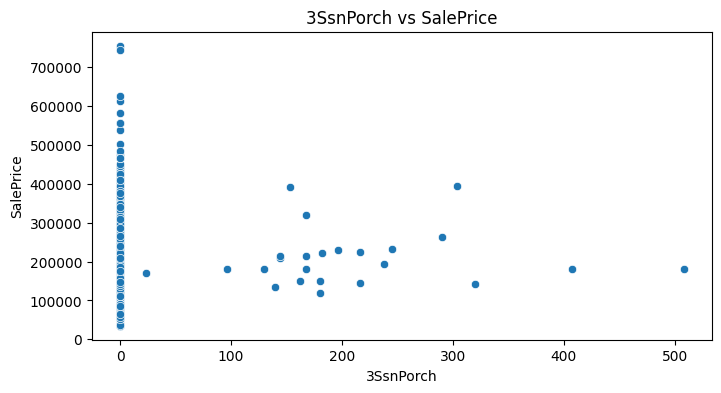

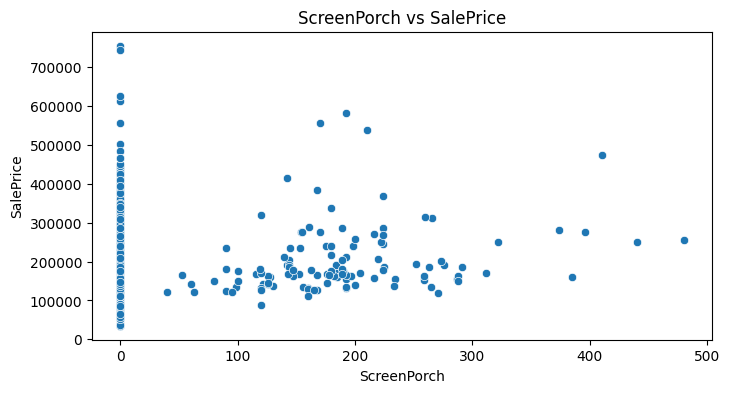

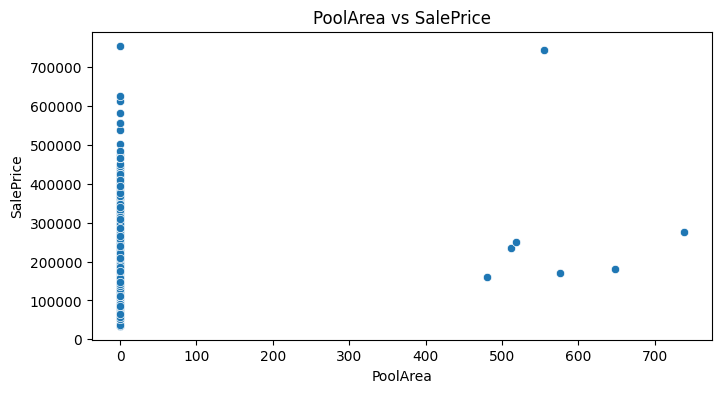

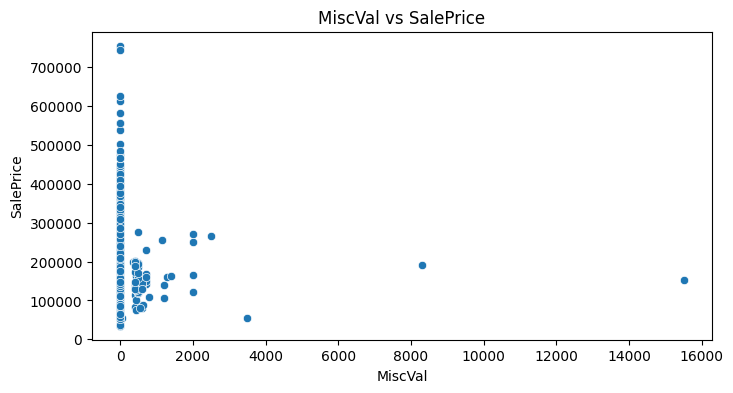

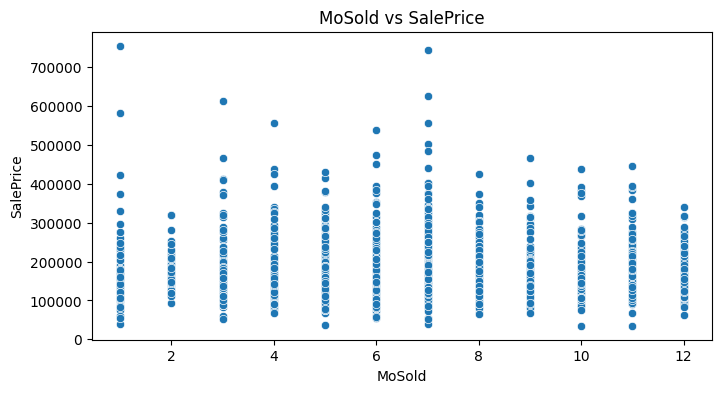

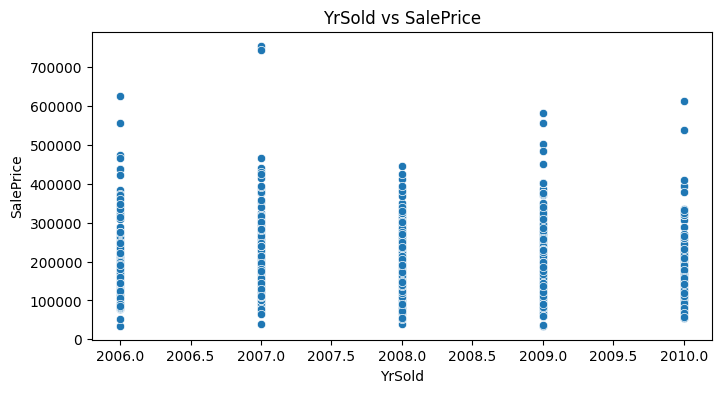

In [80]:
for num in ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'
, 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath'
, 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'
, 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=num, y='SalePrice', data=df_cleaned)
    plt.title(f"{num} vs SalePrice")
    plt.show()

From scater plot above we have insight:

 - `SalePrice` over 700000 in MSSubClass betwen 50-75
 - `LotFrontage` 100 and 150 with outliers `SalePrice` above 700000
 - `LotFrontage` over 300 have 2 outliers with `SalePrice` 150000 and 250000
 - `LotArea` under 50000 with `SalePrice` over 700000
 - `LotArea` above 100000 with `SalePrice` betwen 200000-400000
 - `LotArea` with highest `SalePrice` not bigger than `LotArea` with range 200000-400000
 - any `LotArea` bigger no more expensive with small `LotArea`
 - `OverallQual` type 10 have `SalePrice` bigest than others
 - `OverallCond` type 6 have `SalePrice` bigest than others
 - `SalePrice` with `YearBuilt` 1995 have price over 700000
 - `SalePrice` with `YearBuilt` 1885 have price 480000, maybe antique house/historic house
 - `YearRemodAdd` 1995 has most expensive than other
 - 2 kind `MasVnrArea` 0 and 1190, 2 house most expensive
 - `BsmtFinSF1` over 5000 only one, but `SalePrice` house 190000
 - most expensive `SalePrice` only 1500 `BsmtFinSF1`
 - `BsmtFinSF2` over 5000 only one, but `SalePrice` house 300000
 - most expensive `SalePrice` with `BsmtFinSF1` is 0
 - `BsmtUnfSF` 1000 is most expensive `SalePrice`
 - `TotalBsmtSF` over 6000 only one and moste expesive `SalePrice` around 2300
 - `1stFlSF` over 4000 only 1 house with `SalePrice` 190000
 - `SalePrice` over 700000 no more expensive than `1stFlSF` over 4000
 - `2ndFlSF` with `SalePrice` over 700000 only 2 house, but if no `2ndFlSF` we can see `SalePrice` until 600000
 - most expensive `SalePrice` with `LowQualFinSF` and `SalePrice` around 50000 with `LowQualFinSF`near 600
 - `GrLivArea` like linier if `SalePrice` up, `GrLivArea` up too, but 2 house can be outlier not liner than other
 - `BsmtFullBath` type 0 and 1 with `SalePrice` most expensive, but only one with `BsmtFullBath` type 3 with `SalePrice`190000
 - `BsmthalfBath` type 0 and 1 with `SalePrice` most expensive, but 2 house with `BsmtFullBath` type 3 with `SalePrice` between 100000 until 200000
 - `Fullbath` type 0 with `SalePrice` until 390000
 - `HalfBath` type 2 with `SalePrice` until 200000 more cheap than `HalfBath` type 1 with `SalePrice` until 700000
 - `BedroomAbvgr` until 8 more cheap `SalePrice` than 4 with most expensive `SalePrice`
 - `KitchenAbvGr` type 3 more cheap `SalePrice` than 1 with most exxpensive `SalePrice`
 - `TotRmsAbvGrd` type 14 more cheap `SalePrice` than 10 with most exxpensive `SalePrice`
 - `Fireplaces` 3 more than cheap `SalePrice` than 2 with most expensive `SalePrice`, but `Fireplaces` 0 with `SalePrice` until 350000
 - `GarageYrBlt` in 1900 more expensive `SalePrice` than in part `GarageYrBlt` 1920
 - `GarageCars` with 0 more expensive `SalePrice` than in another part
 - any `GarageArea` with 1400, but more cheap `SalePrice` than `GarageArea` with 800 until `SalePrice` 700000
 - `WoodDeckSF` until more than 800 more cheap `SalePrice` than any `WoodDeckSF` 400, but if any `WoodDeckSF` is 0 `SalePrice` until 600000
 - any `OpenPorchSF` over 500 more cheap `SalePrice` until 250000 than `OpenPorchSF`with `SalePrice` 700000, but any `OpenPorchSF` is 0 with `SalePrice` until 450000
 - any `EnclosedPorch` over 500 with `SalePrice` until 220000 more cheap than any `EnclosedPorch` 300 with `SalePrice` 450000, but if any `EnclosedPorch` with `SalePrice` until 700000
 - any `3SsnPorch` over 500 with `SalePrice` until 190000 more cheap than any `3SsnPorch` 300 with `SalePrice` 400000, but if any `3SsnPorch` with `SalePrice` until 700000
 - any `ScreenPorch` over 400 with `SalePrice` until 250000 more cheap than any `ScreenPorch` 200 with `SalePrice` 590000, but if any `ScreenPorch` with `SalePrice` until 70000
 - any `PoolArea` over 700 with `SalePrice` until 250000 more cheap than any `PoolArea` 550 with `SalePrice` 700000, but if any `PoolArea` with `SalePrice` until 70000
 - any `MiscVal` over 15500 with `SalePrice` until 150000 more cheap than any `MiscVal` 2000 with `SalePrice` 280000, but if any `MiscVal` with `SalePrice` until 70000
 - `MonSold` count highest in 7 and lowest in `MonSold` 2
 - only in `YrSold` 2007 until `SalesPrice` 700000


**Feature Engineering**

From this data we can find feature engineering

In [16]:
df_cleaned['AgeHouse'] = df_cleaned['YrSold'] - df_cleaned['YearBuilt']
df_cleaned['AgeRemod'] = df_cleaned['YrSold'] - df_cleaned['YearRemodAdd']
df_cleaned['TotalSF'] = df_cleaned['TotalBsmtSF'] + df_cleaned['1stFlrSF'] + df_cleaned['2ndFlrSF']
df_cleaned['TotalBath'] = df_cleaned['FullBath'] + (0.5 * df_cleaned['HalfBath']) + df_cleaned['BsmtFullBath'] + (0.5 * df_cleaned['BsmtHalfBath'])
df_cleaned['TotalPorchSF'] = df_cleaned['OpenPorchSF'] + df_cleaned['EnclosedPorch'] + df_cleaned['3SsnPorch'] + df_cleaned['ScreenPorch']
df_cleaned['TotalPorchArea'] = df_cleaned['WoodDeckSF'] + df_cleaned['OpenPorchSF'] + df_cleaned['EnclosedPorch'] + df_cleaned['3SsnPorch'] + df_cleaned['ScreenPorch']
df_cleaned['TotalPorch'] = df_cleaned['OpenPorchSF'] + df_cleaned['EnclosedPorch'] + df_cleaned['3SsnPorch'] + df_cleaned['ScreenPorch']
df_cleaned['RatioPorchSF'] = df_cleaned['TotalPorchSF'] / df_cleaned['TotalSF']
df_cleaned['RatioPorchArea'] = df_cleaned['TotalPorchArea'] / df_cleaned['TotalSF']
df_cleaned['RatioPorch'] = df_cleaned['TotalPorch'] / df_cleaned['TotalSF']
df_cleaned['RatioBath'] = df_cleaned['TotalBath'] / df_cleaned['TotRmsAbvGrd']
df_cleaned['RatioGarageArea'] = df_cleaned['GarageArea'] / df_cleaned['TotalSF']
df_cleaned['RatioGarageCars'] = df_cleaned['GarageCars'] / df_cleaned['TotRmsAbvGrd']
df_cleaned['RatioGarageYrBlt'] = df_cleaned['YrSold'] - df_cleaned['GarageYrBlt']
df_cleaned['RatioLotArea'] = df_cleaned['LotArea'] / df_cleaned['TotalSF']
df_cleaned['RatioLotFrontage'] = df_cleaned['LotFrontage'] / df_cleaned['LotArea']
df_cleaned['RatioMasVnrArea'] = df_cleaned['MasVnrArea'] / df_cleaned['TotalSF']
df_cleaned['RatioFireplaces'] = df_cleaned['Fireplaces'] / df_cleaned['TotRmsAbvGrd']
df_cleaned['RatioPoolArea'] = df_cleaned['PoolArea'] / df_cleaned['TotalSF']
df_cleaned['RatioMiscVal'] = df_cleaned['MiscVal'] / df_cleaned['TotalSF']
df_cleaned['RatioLotArea1stFl'] = df_cleaned['LotArea'] / df_cleaned['1stFlrSF']

**Transformation Data**

We wil change categorical data to one hot encoding

Collect data categorical

In [17]:
cat_data = df_cleaned[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope'
, 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual'
, 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir'
, 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']]


change data categorical to one hot encoding

In [18]:
df_one_hot = pd.get_dummies(cat_data)

Collect numeric column

In [19]:
numeric_col = df_cleaned[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'
, 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath'
, 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'
, 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'AgeHouse', 'AgeRemod'
, 'TotalSF', 'TotalBath', 'TotalPorchSF', 'TotalPorchArea', 'TotalPorch', 'RatioPorchSF', 'RatioPorchArea', 'RatioPorch', 'RatioBath'
, 'RatioGarageArea', 'RatioGarageCars', 'RatioGarageYrBlt', 'RatioLotArea', 'RatioLotFrontage', 'RatioMasVnrArea', 'RatioFireplaces'
, 'RatioPoolArea', 'RatioMiscVal', 'RatioLotArea1stFl']]

scalling only numeric column

In [20]:
scaler = StandardScaler()
numeric_cols = numeric_col.columns
numeric_data_scaled = scaler.fit_transform(df_cleaned[numeric_cols])
df_numeric_scaled = pd.DataFrame(numeric_data_scaled, index=df_cleaned.index, columns=numeric_cols)
df_numeric_scaled['SalePrice'] = df_cleaned['SalePrice']

Final data

In [21]:
df_final = pd.concat([df_one_hot, df_numeric_scaled], axis=1)

In [22]:
df_final.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0             False        False        False         True        False   
1             False        False        False         True        False   
2             False        False        False         True        False   
3             False        False        False         True        False   
4             False        False        False         True        False   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  ...  \
0        False         True         False         False         False  ...   
1        False         True         False         False         False  ...   
2        False         True          True         False         False  ...   
3        False         True          True         False         False  ...   
4        False         True          True         False         False  ...   

   RatioGarageCars  RatioGarageYrBlt  RatioLotArea  RatioLotFrontage  \
0        -0.229015         -1.008328     -0.300484         -0.061120   
1         0.474918          0.073805     -0.128278          0.146692   
2         0.474918         -0.925087     -0.008866         -0.595333   
3         1.279412         -0.883467     -0.108636         -0.518087   
4         0.474918         -0.883467      0.027639         -0.645206   

   RatioMasVnrArea  RatioFireplaces  RatioPoolArea  RatioMiscVal  \
0         0.680033        -0.911731      -0.061182     -0.083238   
1        -0.590364         0.747758      -0.061182     -0.083238   
2         0.405333         0.747758      -0.061182     -0.083238   
3        -0.590364         0.510688      -0.061182     -0.083238   
4         1.150928         0.194595      -0.061182     -0.083238   

   RatioLotArea1stFl  SalePrice  
0           0.104371     208500  
1          -0.253953     181500  
2           0.477292     223500  
3           0.114826     140000  
4           0.513035     250000  

[5 rows x 288 columns]

**Modeling**

We built model before predict `SalesPrice`, Before built model we sparate data train and data test

In [24]:
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Built modeling

We try use all predictor

1. XGBoost Model

In [27]:
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8
)

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Variable Important XGB Model

Top 20 important features:
               Feature  Importance
170            TotalSF       102.0
137            LotArea        77.0
160         GarageArea        66.0
139        OverallCond        61.0
143         BsmtFinSF1        57.0
142         MasVnrArea        57.0
145          BsmtUnfSF        56.0
149          GrLivArea        51.0
188  RatioLotArea1stFl        50.0
136        LotFrontage        49.0
138        OverallQual        49.0
146        TotalBsmtSF        42.0
140          YearBuilt        39.0
171          TotalBath        37.0
166             MoSold        37.0
168           AgeHouse        35.0
141       YearRemodAdd        34.0
182       RatioLotArea        34.0
183   RatioLotFrontage        34.0
7         LotShape_IR1        32.0


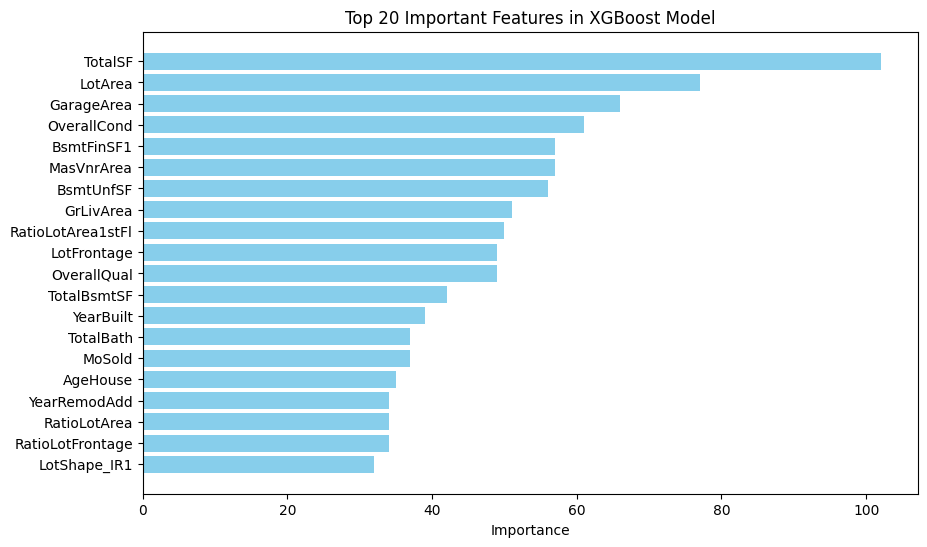

In [42]:
importance_xgb = xgb_model.get_booster().get_score(importance_type='weight')

# Convert to DataFrame for better handling
importance_df = pd.DataFrame(importance_xgb.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 20 features
top_20_features = importance_df.head(20)

print("Top 20 important features:")
print(top_20_features)

# Optionally plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Important Features in XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

2. Randomforest Model

In [29]:
randomforest_model = RandomForestRegressor(n_estimators=1000, criterion='squared_error',
                                            max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                            min_weight_fraction_leaf=0.0, max_features= 'sqrt',
                                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                                            bootstrap=True, oob_score=False, n_jobs=-1,
                                            random_state=101, verbose=0, warm_start=False,
                                            ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
randomforest_model.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=1000, n_jobs=-1,
                      random_state=101)

Variable Important Randomforest

Top 20 Important Features:
              Feature  Importance
268           TotalSF    0.083864
233       OverallQual    0.064025
245         GrLivArea    0.055671
255        GarageCars    0.037816
241       TotalBsmtSF    0.037071
242          1stFlrSF    0.037069
256        GarageArea    0.035793
269         TotalBath    0.030094
266          AgeHouse    0.029042
235         YearBuilt    0.028031
128      ExterQual_TA    0.026641
254       GarageYrBlt    0.021431
238        BsmtFinSF1    0.017808
279  RatioGarageYrBlt    0.017279
248          FullBath    0.017267
252      TotRmsAbvGrd    0.017119
236      YearRemodAdd    0.016833
232           LotArea    0.015314
267          AgeRemod    0.015171
243          2ndFlrSF    0.015161


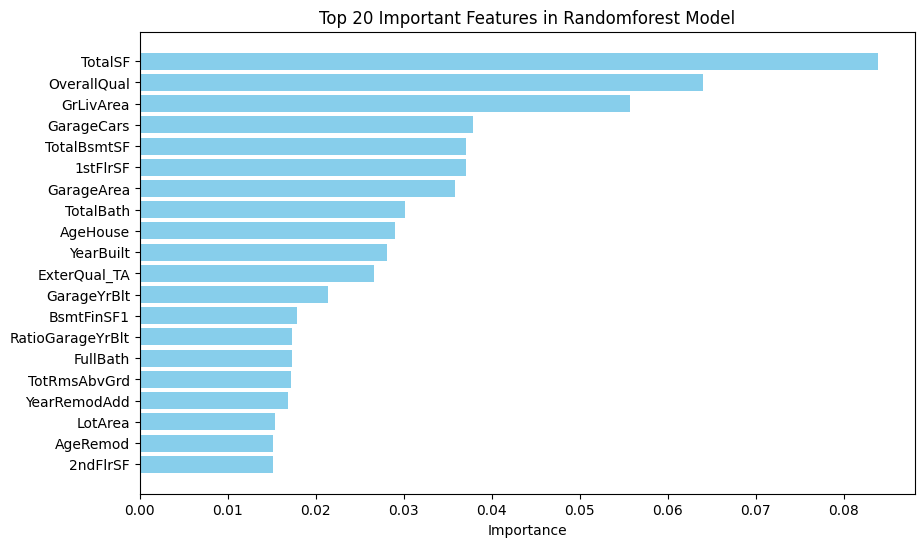

In [43]:
importance_rf = randomforest_model.feature_importances_

# Convert to DataFrame and get top 20 features
top_20_features_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_rf})
top_20_features_rf = top_20_features_rf.sort_values(by='Importance', ascending=False).head(20)

# Display the top 20 important features
print("Top 20 Important Features:")
print(top_20_features_rf)

# Optionally plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(top_20_features_rf['Feature'], top_20_features_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Important Features in Randomforest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

3. Deep Learning

In [73]:
def rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error using TensorFlow functions."""
    # Cast y_true to float32 to match y_pred's type
    y_true = tf.cast(y_true, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

model_house = Sequential([
    Dense(287, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model_house.compile(optimizer='adam', loss='mse', metrics=[rmse])

history = model_house.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 40213508096.0000 - rmse: 199884.8594 - val_loss: 37095919616.0000 - val_rmse: 192428.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 39768907776.0000 - rmse: 198715.5156 - val_loss: 28098586624.0000 - val_rmse: 167364.0469
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 17095536640.0000 - rmse: 123140.2188 - val_loss: 1056527040.0000 - val_rmse: 30156.6934
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2031600000.0000 - rmse: 42360.7734 - val_loss: 924802560.0000 - val_rmse: 28496.9883
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1678355200.0000 - rmse: 37871.1602 - val_loss: 836674688.0000 - val_rmse: 26987.2422
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1807060736.0000 - rmse: 39587.6992 - val_loss: 790187392.0000 - val_rmse: 26214.2812
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1409836928.0000 - rmse: 34138.9531 - val_loss: 706179008

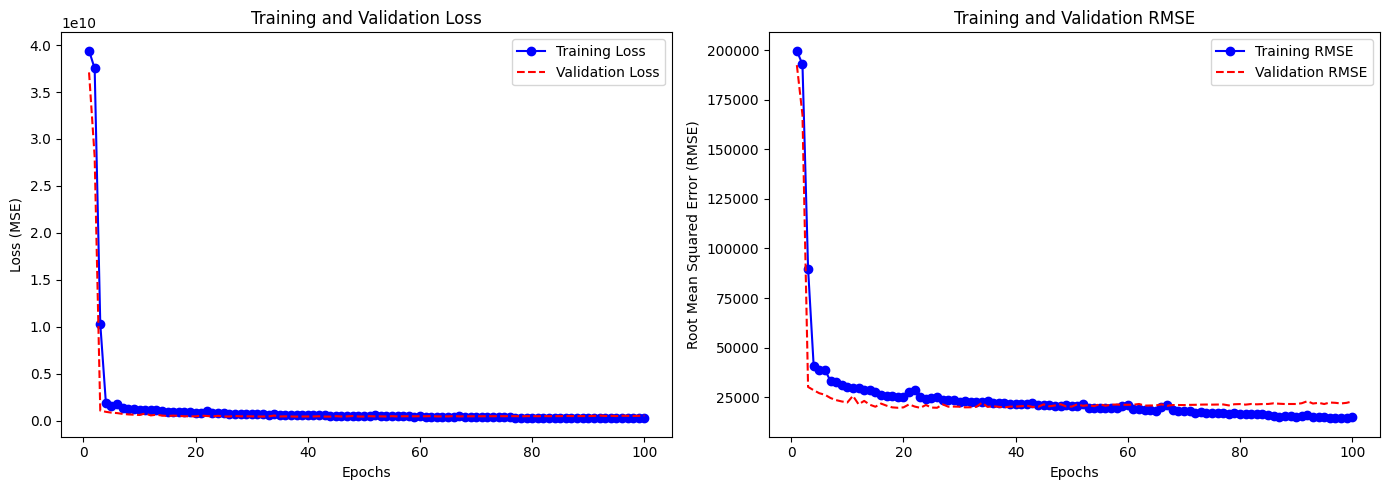

In [74]:
# Mendapatkan data history
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
rmse = history_dict['rmse']
val_rmse = history_dict['val_rmse']

# Membuat list epoch
epochs = range(1, len(loss) + 1)

# Plotting Loss
plt.figure(figsize=(14, 5))

# Plot loss untuk training dan validation
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot RMSE untuk training dan validation
plt.subplot(1, 2, 2)
plt.plot(epochs, rmse, 'bo-', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r--', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()

plt.tight_layout()
plt.show()

**Hyperparamater Tuning**

1. XGBoost Model

In [37]:
hyperparameter_grid = {
    'n_estimators': [100, 400, 800, 1000, 1300],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.001,0.01,0.1,0.30],
    'min_child_weight':[5,6,7,8],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }

# Perform grid search
xgb_random = RandomizedSearchCV(estimator=xgb_model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=42)

xgb_random.fit(X_train,y_train)
xgb_random.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
xgb_model_subtitute=XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None, colsample_bylevel=None,
             eval_metric= None, colsample_bynode=None, colsample_bytree=0.8, gamma=None, device=None,
             importance_type=None, interaction_constraints=None, early_stoping_rounds=None, feature_types=None,
             grow_policy=None, max_bin=None, max_cat_to_onehot=4, max_delta_step=None,
             learning_rate=0.01, max_depth=5, multi_strategy=None,
             min_child_weight=6, missing=np.nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, random_state=None)
xgb_model_subtitute.fit(X_train,y_train)

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stoping_rounds=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=4, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

Variable Important Subtitute XGB

Top 20 important features:
               Feature  Importance
170            TotalSF       102.0
137            LotArea        77.0
160         GarageArea        66.0
139        OverallCond        61.0
143         BsmtFinSF1        57.0
142         MasVnrArea        57.0
145          BsmtUnfSF        56.0
149          GrLivArea        51.0
188  RatioLotArea1stFl        50.0
136        LotFrontage        49.0
138        OverallQual        49.0
146        TotalBsmtSF        42.0
140          YearBuilt        39.0
171          TotalBath        37.0
166             MoSold        37.0
168           AgeHouse        35.0
141       YearRemodAdd        34.0
182       RatioLotArea        34.0
183   RatioLotFrontage        34.0
7         LotShape_IR1        32.0


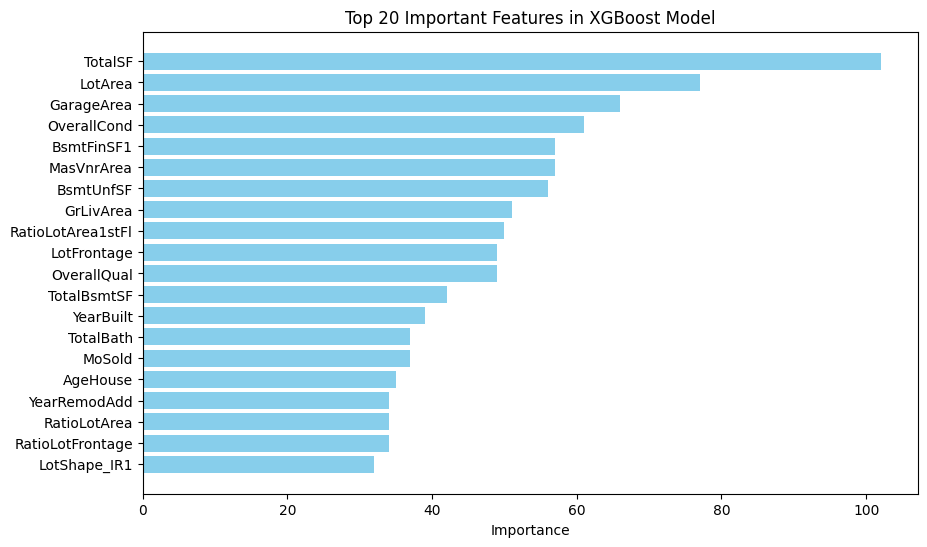

In [44]:
importance_xgb_subtitute = xgb_model_subtitute.get_booster().get_score(importance_type='weight')

# Convert to DataFrame for better handling
importance_df = pd.DataFrame(importance_xgb_subtitute.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 20 features
top_10_features = importance_df.head(20)

print("Top 20 important features:")
print(top_20_features)

# Optionally plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Important Features in XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

2. Randomforest Model

In [45]:
hyperparameter_grid_rf = {
    'n_estimators': [100, 400, 800, 1200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
    }

# Perform grid search
rf_random = RandomizedSearchCV(estimator=randomforest_model,
                               param_distributions=hyperparameter_grid_rf,
                                n_iter=10, scoring='neg_mean_absolute_error',
                                n_jobs=None,refit=True, cv=5,
                                verbose=3, pre_dispatch='2*n_jobs',
                                random_state=101,
                                return_train_score=True)

rf_random.fit(X_train,y_train)
rf_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=(train=-14022.725, test=-20667.819) total time=   3.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=(train=-14308.632, test=-19789.580) total time=   3.6s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=(train=-13868.620, test=-20325.553) total time=   2.3s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=(train=-14086.268, test=-20569.106) total time=   2.4s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200;, score=(train=-14567.774, test=-17988.604) total time=   2.3s
[CV 1/5] 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=800,
                      n_jobs=-1, random_state=101)

In [46]:
rf_model_subtitute=RandomForestRegressor(bootstrap=False, max_depth=40,
                                max_features= 'sqrt', min_samples_leaf=2,
                                min_samples_split=5, n_estimators= 800, n_jobs=-1,
                                random_state=101)
rf_model_subtitute.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=800,
                      n_jobs=-1, random_state=101)

Variable Important Randomforest Subtitute

Top 20 Important Features:
              Feature  Importance
268           TotalSF    0.085270
233       OverallQual    0.070312
245         GrLivArea    0.056680
255        GarageCars    0.041811
256        GarageArea    0.040224
241       TotalBsmtSF    0.037300
242          1stFlrSF    0.037132
235         YearBuilt    0.034181
269         TotalBath    0.031322
128      ExterQual_TA    0.027173
266          AgeHouse    0.026725
248          FullBath    0.022964
182    KitchenQual_Ex    0.020708
254       GarageYrBlt    0.020497
238        BsmtFinSF1    0.018584
252      TotRmsAbvGrd    0.018488
279  RatioGarageYrBlt    0.018154
140       BsmtQual_Ex    0.016660
267          AgeRemod    0.016397
232           LotArea    0.015205


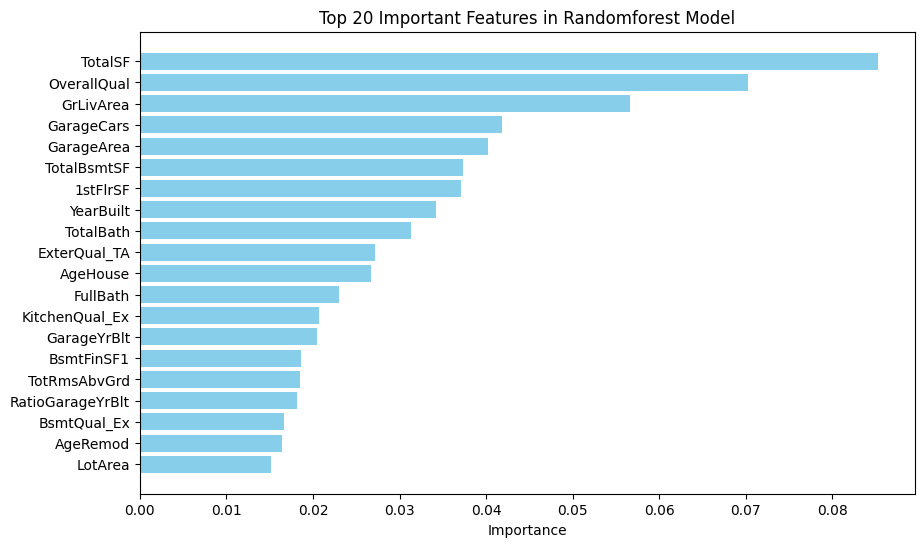

In [47]:
importance_rf_subtitute = rf_model_subtitute.feature_importances_

# Convert to DataFrame and get top 10 features
top_20_features_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_rf_subtitute})
top_20_features_rf = top_20_features_rf.sort_values(by='Importance', ascending=False).head(20)

# Display the top 20 important features
print("Top 20 Important Features:")
print(top_20_features_rf)

# Optionally plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(top_20_features_rf['Feature'], top_20_features_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Important Features in Randomforest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

3. Deep Learning

In [75]:
def rmse(y_true, y_pred):
    # Cast y_true to y_pred's type to ensure compatibility
    y_true = tf.cast(y_true, y_pred.dtype)
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

def build_model(hp):

    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    for i in range(5):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                               activation='relu'))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer
    model.add(layers.Dense(1))

    # Compile model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])),
                  loss='mse',
                  metrics=['mae', rmse])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_regression_tuning'
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_mae',
    patience=8,
    restore_best_weights=True
)

tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.2,
             batch_size=5,
             callbacks=[early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from my_dir/keras_regression_tuning/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


**Evaluation**

For evaluation we use RMSE

In [79]:
# XGB Model (Basic)
xgb_basic = xgb_model.predict(X_test)

# XGB Random
xgb_random_tune = xgb_random.predict(X_test)

# XGB Subtirute
xgb_subtitute = xgb_model_subtitute.predict(X_test)

# Randomforest (Basic)
randomforest_basic = randomforest_model.predict(X_test)

# Randomforest (Tune)
rf_random_tune = rf_random.predict(X_test)

# Randomforest (Subtitute)
rf_subtitute = rf_model_subtitute.predict(X_test)

# Deep Learning
deep_learning_basic = model_house.predict(X_test)

# Deep Learning (Tune)
deep_learning_tune = best_model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [77]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [78]:
print(f"XgBoost Basic RMSE: {rmse(y_test, xgb_basic):.4f}")
print(f"xgb_subtitute RMSE: {rmse(y_test, xgb_subtitute):.4f}")
print(f"Randomforest Basic RMSE: {rmse(y_test, randomforest_basic):.4f}")
print(f"rf_subtitute RMSE: {rmse(y_test, rf_subtitute):.4f}")
test_loss, test_rmse = model_house.evaluate(X_test, y_test, verbose=1)
print(f"Deep Learning RMSE on Test Set: {test_rmse}")
test_loss, test_mae , test_rmse = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Deep Learning (Tune) RMSE on Test Set: {test_rmse}")

XgBoost Basic RMSE: 29086.6397
xgb_subtitute RMSE: 32068.1320
Randomforest Basic RMSE: 34850.4351
rf_subtitute RMSE: 34166.0758
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1432828416.0000 - rmse: 31945.6445
Deep Learning RMSE on Test Set: 35181.6484375
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1088803840.0000 - mae: 16711.4590 - rmse: 28774.7285 
Deep Learning (Tune) RMSE on Test Set: 29046.00390625


**Conclusion**

there is a `SalePrice` that reaches up to 700000 with a `LotArea`, but there is a lesser `LotArea` with a price of around 400000. there is `SalePrice` 700000 with `1stFlSF` around 2400, but there is `SalePrice` 200000 with `1stFlSF` above 4000. From the XGBoost and randomforest models, for the highest feature importance is `TotalSF`, while for deep learning it cannot be read, for the smallest RSME value is the Deep Learning model.

**Reference**

1. https://www.analyticsvidhya.com/blog/2022/11/hyperparameter-tuning-using-randomized-search/
2. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/
3. https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
4. https://www.tensorflow.org/guide/keras
5. https://keras.io/